# IIA project GG3: Neural Data Analysis

Easter 2025<br>
Project Leader: Yashar Ahmadian (ya311)


## Important dates

Project start: __Thursday May 15 2025, 9:30am GMT+1 (UK summer time), in LR3A__

Interim report deadline: 🔥__Thursday 22 May 2025, 4:00pm__🔥 (electronic submission via Moodle)
<br>
(Interim report should contain report on tasks under the header "**Week 1**".

Presentations: __Monday 2 June 2025, 11am-12:30pm in LR5__

Final project report deadline: __Thursday 12 June 2025,  4pm__ (electronic submission via Moodle)


## Project notes

- You should spend about 20 hours a week on the project, basically half of your time.
- Project is to be carried out in **Google Colab** or on your own computer. You can download this notebook and use it with a normal Jupyter server, or duplicate it here in your **Colab** account. If you do the latter, you can share and show your work easily. The computational resources on **Colab** are limited, so you may find it more convenient to run the programs on your own computer, especially in the later parts of the project when computations will be heavier. When you need to ask a question about a specific piece of code, you can still use the **Colab** to share a notebook.
- Weekly sessions will be held on Mondays 11:00-13:00, and Thursdays 9:00-11:00 and 14:00-16:00 all in **LR5** (EXCEPT for Thursday 5th June which will be in LR10).
- Attendance is compulsory for the first/introductory session and all Monday sessions. Thursday sessions will be optional (although this is still subject to change), but attending them is a good way to get answers to questions, some help with coding. It also provides space for teamwork with your teammates.
- You are strongly encouraged to seek verbal feedback after your interim report - there will be a special session for this on Monday May 20 and Thursday May 23.
- Project carries 80 marks overall:
  - 20 marks for interim report (individual)
  - 20 marks for presentation (group based)
  - 40 marks for final report (individual)<br>
  
  
### Project reports
  - Should be clearly broken down by _Tasks_ (see below), any notes you wish to make in how you or your group structured and carried out the tasks, and most importantly your __results__ in the form of completely labelled graphs, and __accompanying conclusions__ you draw from your results.
  - **Page limits:**
    -- Interim report 2-3 pages (max 3) of text + max 2 pages of figure (all figures should come after the text pages, starting a new page).
    -- Final report: about 5-6 pages (no more than 6) of text + max 4 pages of figures\\
    -- These limits exclude any appendices such as attached code. The final report can be an extension of the interim report, but make sure you take into account the feedback you receive for your interim report.  
  - When deciding what to include in your report, how to organise it and what to emphasize, please prioritise communicating understanding over formalities - I would like give you marks for doing the right thing and showing that you did it and understand it. If I have to wade through pages of undigested data and graphs shown just because it was there, I will feel less generous. The length requirements are only guidelines.
  - Take a look at [this page](http://teaching.eng.cam.ac.uk/node/444/#hdr-9) and [this](http://teaching.eng.cam.ac.uk/node/340) for further guidance and recommendations for writing reports.
  - __All code__ that you used during to project must be attached as an appendix to your reports. If you modified one of the provided `.py` file (and you used that modified version for that report), include it.
  - A jupyter or **Colab** notebook are acceptable as a report, as long as it is "clean" (its main section includes text and figures) and reads like a report, and (importantly) can be converted to a PDF, so you can upload it to the Moodle submission protal.
  - Incude [cover sheets](http://teaching.eng.cam.ac.uk/node/4171) provided by the Teaching Office
  
### Presentations:
- Each group will jointly prepare and present a **12 minute (strict!)** presentation, broken up into three **4-minute parts** each delivered by one of the team members.<br>
There will be 3 minutes of question time after each talk, and so overall the session should take about an hour and a half.

- Since many tasks are not intrinsically divided between team members, the part presented by a student need not be something they solely contributed to.
- The presentations will be delivered at the beginning of Week 3, **Monday 27 May** during the regular session time in **LR5**.
- I will give guidelines and recommendations for making good presentations in due course.

## Timeline

See the Approximate Timeline section below.

## Survey

The **online survey** should be completed at the end of the project period.

# Neuroscience Background

The background is also provided as a Jupyter notebook [accessible here](https://github.com/ahmadianlab/gg3_nda/blob/main/Background.ipynb).

**Note:** The main point of the Background handout is to introduce some terminology (which appear all in boldface),<br>
and mathematical notation that will be used in the next section, "What is the right model of LIP?"<br>
Deep understanding of this Background  section is not required for carrying out the project. But, apart from the<br>
above reason, you are encourged to read it to understand the scientific motivations and significance of this problem.

# What is the right model of LIP?

### Alternative hypothesis: stepping model

As we saw in the Background section, classic studies suggested that LIP neurons which exhibit ramping activity in<br>
their trial-averaged PSTH's are involved in evidence accumulation. However, the story became more complicated,<br>
when in 2015, [Latimer et al.](https://www.science.org/doi/10.1126/science.aaa4056) provided evidence that most LIP neurons are better modelled<br>
 as neurons with a "stepping firing rate". In this alternative model
 the rate does not continuously ramp up or down<br>  (albeit via a random walk) as in a drif-diffusion model.
Rather, the rate is piece-wise constant:<br> it starts relatively low, but at some time point it jumps ("steps") up discontinuously to <br>
a higher firing rate level. The jump point is random and varies from trial to trial, according to some distribution. <br>

#### -------------------------------   Figure 1   -------------------------------
<img src="https://github.com/ahmadianlab/gg3_nda/blob/main/figs/latimer-step-ramp.png?raw=1" width=600 />

We will refer to these two competing hypotheses or models as the **ramping** and **stepping models**, respectively<br>
(other common synonyms for the ramping model are "the drif-diffusion model", mentioned above, and "the diffusion-to-bound model";<br>
we will also use **jump model** as synonymous with the stepping model.)

In this project we aim to develop tools that allow us to reject or accept one of these hypotheses<br>
based on observed spike trains. Understanding which of the two is a more accurate description of LIP activity <br>
is scientifically significant. The ramping hypothesis suggests that LIP cortex is responsible<br>
for accumulating evidence to inform and make decisions. On the other hand, the binary nature of the stepping model<br>
suggests that LIP is downstream of the evidence accumulating area, and may simply reflect, in its activity, the decision already made<br>
in an upstream area.

# Two generative models


So far, our two "models" have mostly remained conceptual and qualitative. At this high, conceptual level <br>
I will therefore refer to them as hypotheses instead: the ramping hypothesis vs. stepping hypothesis. <br>
However, in order to use the powerful tools of probability theory and machine learning, we need to <br>
turn these conceptual hypotheses into well-defined mathematical models.

### The common, abstract model structure
The ramping and stepping models to be described here and simulated in the project,  are examples of<br>
**probabilistic generative models**. Each model has a set of **parameters** (such as the drift rate of the ramping model),<br>
and it stochastically generates data, in our case spike trains. The systematic behaviour of these spike trains depends<br>
 on the various model parameters. Mathematically, this stochastic relationship between the parameters and data<br>
 is given by a conditional probability distribution

$P(\mathrm{data}| \Theta, M)$

where $\Theta$ denotes the set of parameters and $M$ denotes the model (in our case $M$ = ramping, or $M =$ stepping).<br>
This conditional probability, when viewed as a function of $\Theta$, is called the model's **likelihood function**.<br>
By (observed) "data" we mean a set of spike-trains recorded (in our case simulated) over many trials:

$
\text{data} \equiv \{(n_t)_{t=1}^T\}.
$

$n_t$ will sometimes be referred to as **observed variables**.

**Latent variables:** As generative models, the two models can also be simulated to generate spike trains. In order to do this, <br>
the two models first generate a firing rate function or time-series, $r_t$. The spike count, $n_t$, in a given<br>
time bin is then stochstically generated based solely on $r_t$. The rate sequence $r_t$ is itself a stochastic<br>
process, and depends on a set of *latent variables*. Latent variables are random variables that are so called<br>
because they are not directly observed by us (data-)scientists and engineers, but need to be inferred from observed<br>
data (the spike trains). In the simple version of the stepping model, with which we will start, there is only <br>
a single latent variable: the stepping time. The ramping model, on the other hand, generates a whole sequence of <br>
latent variables in each trial: these are the values of the ramping stochastic process, which is closely tied to the<br>
firing rate.

Since the latent variables (unlike the model parameters) vary from trial to trial, in each trial they need to be<br>
inferred from a single spike-train. By contrast, parameters which control the systematic behaviour of the model will<br>
be inferred from the entire dataset, i.e. the collection of spike trains in all trials.

**Discrete vs continuous time:** Both models are implemented in discrete time. Thus the varible $t$ above is an integer<br>
(index for the) time-step. We will denote the (fixed) total number of time steps in a trial by $T$. Real trials<br>
last on the order of 1 second, and we would want our time steps or time bins to be around 1 to 10 milliseconds. <br>
So, correspondingly, $T$ will be rather large, we will experiment with $T=$ 100 to 1000. For various purposes, <br>
we will need to convert from discrete to continuous time in seconds. For that purpose we will fix the trial duration at<br>
1 second and thus interpret each time-step to have duration $1/T$ seconds; we will denote this by $dt$ here and in the code<br>
(thus $dt = 1/T$ seconds).

We will now describe the probabilistic structure of the two models in some detail.

### Stepping model

**Latent variables:** This is the simpler one of the two. The only latent variable of this model is the step time or **jump time**. <br>
I will denote the step time in trial $j$ by $\tau_j$. Since we work in discrete time, $\tau_j$ is a (non-negative) integer.<br>
In `models.py` the corresponding variable is called `jump` or (when containing the value of multiple trials) `jumps`.<br>
In each trial, the step time is sampled from some probability distribtion:

$\tau \sim P(\tau)$

In the provided code this distribution is a so-called **negative binomial distribution** (see [this](https://en.wikipedia.org/wiki/Negative_binomial_distribution)) with two parameters: $m$ and $r$.<br>
$m$ sets the average step time, and $r$ ... that's left for you to figure out.<br>

As we said above, in each trial, the firing rate sequence of this model is piece-wise constant. If we denote the jump time of trial<br>
$j$ by $\tau_j$, then for $t < \tau_j$, $r_t = R_0$ and for $t \geq \tau_j$, $r_t = R_h > R_0$, where the two constants $R_0$ and $R_h$ are <br>
part of the model parameters. We will refer to them as pre- and post-step firing rates.

Finally, given the rate sequence, $r_t$, the spike counts in different timesteps are generated indpendently from a [Poisson distribution](https://en.wikipedia.org/wiki/Poisson_distribution):

$n_t \sim \mathrm{Poiss}(r_t dt)$

Note  that since we measure rates in Hz, $dt$ has to be in seconds, in order to get the right dimensionless parameter (mean spike count) of <br>
of the Poisson distribution.

**Fit parameters:** $m, r, \text{ and } x_0$.

These are the parameters which you aim to infer from spike train datasets.<br>
$x_0$ is equivalent to $R_0$ and is given by $R_0/R_h$; think of it as the noramalised pre-step rate<br>
(we use $x_0$ instead of $R_0$, to match the similar parameter in the ramping model). By definition $0< x_0 < 1$.

**"Fixed" parameters:** We will take $R_h$ as known/fixed, and will not infer it from data. For many project tasks we will fix it at $R_h = 50$ Hz.<br>
Though in early tasks you will explore its effects by varying it.

### Ramping model

**Latent variables:** This model, which approxmiates the continuous time drift-diffusion model, has a whole sequence of latent variables<br>
which we will denote by $x_t$. This variable is the so-called **decision variable**. The update equations for $x_t$ are discretised versions<br>
of the equation in Figure 3:

$x_{t+1} = x_t + \beta dt + \sigma \sqrt{dt} \epsilon_t \qquad\qquad\qquad$            Eq. (1)

where

$\epsilon_t \overset{iid}{\sim} \mathcal{N}(0,1) \qquad\qquad\qquad$            Eq. (2)

(i.e. $\epsilon_t$ is sampled independently in each time step from the standard normal distribution, $\mathcal{N}(0,1)$, in other words, it has<br>
a Gaussian distribution with mean 0 and variance 1.) The initial condition is set via

$
x_1 = x_0 + \sigma \sqrt{dt} \epsilon_0
$

where $\epsilon_0$ is again standard normal, and $x_0$ is a model parameter (and not a latent variable, <br>
as it is the same across all trials). (Note that, due to python indices starting from 0, the equation above will (implicitly)<br>
appear as `x[0] = x0 + sigma * np.random.randn()` in the code).

The firing rate in this model is a rectified and scaled version of $x_t$:

$r_t = R_h [x_t]_+ = R_h \max(0, x_t)$

It is not hard to see that the sequential variables $x_t$ form a Markov chain (this has to do with the fact that $\epsilon_t$<br> in different
trials are independent), and therefore the ramping model is an example of a **hidden Markov model (HMM)**.<br>
In fact, if you have taken 3F8, you will realise that $x_t$ is *almost* an AR(1) Gaussian Process. I said almost an AR(1) Gaussian process, because<br>

*when $x_t$ reaches 1, it will get stuck there for the rest of the trial*. (Equivalently, after this point, the firing rate, $r_t$, stays at its<br>
maximal level $R_h$.)

This reflects the interpretation of $x_t$ as a decision variable, which upon reaching a pre-set bound or threshold, triggers<br>
the decision; in our case the bound is 1.

Similar to the stepping model, given the rate sequence, $r_t$, the spike counts in different timesteps are generated indpendently from a Poisson distribution

$n_t \sim \mathrm{Poiss}(r_t dt)$.

**Fit parameters:** $\beta, \sigma, \text{ and } x_0$.

$\beta$ and $\sigma$ control the systematic drift vs. stochasticity of the ramping variable $x_t$.<br>
Similar to the stepping model, $x_0$ sets the initial rate, $r_0$, via $r_0 = R_h x_0$. And again $0< x_0 < 1$.

**"Fixed" parameters:**  $R_h$, maximal rate, to be treated as in the stepping time.


### Ignored stimulus dependence

In the full version of the ramping model, the magnitude and sign of $\beta$ depends on the coherence and the direction of motion of the RDM stimulus<br>
in that trial. However, for simplicity, in this project we assume $\beta$ is fixed in all trials and assume it is positive.<br>

Similarly, in the full version of the stepping model, the post-jump rate can take two possible values $R_h > R_0$, as described above, <br>
or $R_l < R_0$. We can call $R_h$ and $R_l$ the up or down rates, and call their normalized values of 1 and $R_l/R_h < 1$ up and down states.<br>
The probability with with the model transition up or down after the jump time can again depend on the coherence and direction of motion of the <br>
RDM stimulus in a trial. But again, to simplify the model, we ignore this fact. In fact, for most of the project we work with a stepping model<br>
without a down state.



# Approximate timeline


Our task in this project is to slowly build up techniques to ultimately reject or accept one or the other hypothesis based on
recorded (or, in our case, simulated) spike trains. We will do this by progressively moving from lower to higher levels of
probabilistic inference.


- (week 1) explore the behaviour of the two models based on simulator code provided to you in `models.py`.<br>
And take preliminary steps towards developing a discrete-state HMM approximation to them, which allows us to apply  powerful inference tools.

- (week 2) develop tools to carry out **single-trial inference**  of the models' latent variables from observed  
on single spike trains, taking advantage of their HMM formulation.

- (weeks 2-3) Assuming model $M$ is the true model underlying data, use Bayesian or maximum-likelihood inference to infer or estimate<br>
model parameters, $\Theta$, based on observed data, that is, many trials of simulated spike trains.

- (weeks 3-4) Use Bayesian inference to select/reject one or the other hypothesis/model, given a dataset of spike trains.<br>

Depending on feedback and pace of progress, in week 4 we will also investigate the consequences of model mismatch. Since "all models are wrong (but some are useful)",<br>
what can we say about the possibility of reaching wrong conclusions regarding our alternative conceptual hypotheses, due to <br>
some arbitrary choices we had to make in translating those conceptual models to concrete mathematical models?


# Running on Google Colab
As I said in the Intro lecture, the project Jupyter notebook is accessible via [Google Colab](https://colab.research.google.com/github/ahmadianlab/gg3_nda/blob/main/GG3_project.ipynb#scrollTo=ad546cd7). You can choose to run your notebook on either of those, or you can download it from there (or from the [GitHub](https://github.com/ahmadianlab/gg3_nda/blob/main/GG3_project.ipynb)) and run things on your own machine, which may be faster.

If you use Colab, you will have to "Save a copy in Drive" in order to be able to save your changes (if you don't have Google Drive, then either sign up for it, or you need to download and work on your laptop).

Finally, the `.py` modules (including Week 1's `models.py`) are accessible and can be downloaded from the [GitHub](https://github.com/ahmadianlab/gg3_nda/) page. <br>
Alternatively, on Colab, you will have to run the following cell to import them.

# Week 1
### model simulation and behaviour



In [627]:
import numpy as np
import numpy.random as npr


def lo_histogram(x, bins):
    """
    Left-open version of np.histogram with left-open bins covering the interval (left_edge, right_edge]
    (np.histogram does the opposite and treats bins as right-open.)
    Input & output behaviour is exactly the same as np.histogram
    """
    out = np.histogram(-x, -bins[::-1])
    return out[0][::-1], out[1:]


def gamma_isi_point_process(rate, shape):
    """
    Simulates (1 trial of) a sub-poisson point process (with underdispersed inter-spike intervals relative to Poisson)
    :param rate: time-series giving the mean spike count (firing rate * dt) in different time bins (= time steps)
    :param shape: shape parameter of the gamma distribution of ISI's
    :return: vector of spike counts with same shape as "rate".
    """
    sum_r_t = np.hstack((0, np.cumsum(rate)))
    gs = np.zeros(2)
    while gs[-1] < sum_r_t[-1]:
        gs = np.cumsum( npr.gamma(shape, 1 / shape, size=(2 + int(2 * sum_r_t[-1]),)) )
    y, _ = lo_histogram(gs, sum_r_t)

    return y



class StepModel():
    """
    Simulator of the Stepping Model of Latimer et al. Science 2015.
    """
    def __init__(self, m=50, r=10, x0=0.2, Rh=50, isi_gamma_shape=None, Rl=None, dt=None):
        """
        Simulator of the Stepping Model of Latimer et al. Science 2015.
        :param m: mean jump time (in # of time-steps). This is the mean parameter of the Negative Binomial distribution
                  of jump (stepping) time
        :param r: parameter r ("# of successes") of the Negative Binomial (NB) distribution of jump (stepping) time
                  (Note that it is more customary to parametrise the NB distribution by its parameter p and r,
                  instead of m and r, where p is so-called "probability of success" (see Wikipedia). The two
                  parametrisations are equivalent and one can go back-and-forth via: m = r (1-p)/p and p = r / (m + r).)
        :param x0: determines the pre-jump firing rate, via  R_pre = x0 * Rh (see below for Rh)
        :param Rh: firing rate of the "up" state (the same as the post-jump state in most of the project tasks)
        :param isi_gamma_shape: shape parameter of the Gamma distribution of inter-spike intervals.
                            see https://en.wikipedia.org/wiki/Gamma_distribution
        :param Rl: firing rate of the post-jump "down" state (rarely used)
        :param dt: real time duration of time steps in seconds (only used for converting rates to units of inverse time-step)
        """
        self.m = m
        self.r = r
        self.x0 = x0

        self.p = r / (m + r)

        self.Rh = Rh
        if Rl is not None:
            self.Rl = Rl

        self.isi_gamma_shape = isi_gamma_shape
        self.dt = dt


    @property
    def params(self):
        return self.m, self.r, self.x0

    @property
    def fixed_params(self):
        return self.Rh, self.Rl


    def emit(self, rate):
        """
        emit spikes based on rates
        :param rate: firing rate sequence, r_t, possibly in many trials. Shape: (Ntrials, T)
        :return: spike train, n_t, as an array of shape (Ntrials, T) containing integer spike counts in different
                 trials and time bins.
        """
        if self.isi_gamma_shape is None:
            # poisson spike emissions
            y = npr.poisson(rate * self.dt)
        else:
            # sub-poisson/underdispersed spike emissions
            y = gamma_isi_point_process(rate * self.dt, self.isi_gamma_shape)

        return y


    def simulate(self, Ntrials=1, T=100, get_rate=True):
        """
        :param Ntrials: (int) number of trials
        :param T: (int) duration of each trial in number of time-steps.
        :param get_rate: whether or not to return the rate time-series
        :return:
        spikes: shape = (Ntrial, T); spikes[j] gives the spike train, n_t, in trial j, as
                an array of spike counts in each time-bin (= time step)
        jumps:  shape = (Ntrials,) ; jumps[j] is the jump time (aka step time), tau, in trial j.
        rates:  shape = (Ntrial, T); rates[j] is the rate time-series, r_t, in trial j (returned only if get_rate=True)
        """
        # set dt (time-step duration in seconds) such that trial duration is always 1 second, regardless of T.
        dt = 1 / T
        self.dt = dt

        ts = np.arange(T)

        spikes, jumps, rates = [], [], []
        for tr in range(Ntrials):
            # sample jump time
            jump = npr.negative_binomial(self.r, self.p)
            jumps.append(jump)

            # first set rate at all times to pre-step rate
            rate = np.ones(T) * self.x0 * self.Rh
            # then set rates after jump to self.Rh
            rate[ts >= jump] = self.Rh
            rates.append(rate)

            spikes.append(self.emit(rate))

        if get_rate:
            return np.array(spikes), np.array(jumps), np.array(rates)
        else:
            return np.array(spikes), np.array(jumps)


class RampModel():
    """
    Simulator of the Ramping Model (aka Drift-Diffusion Model) of Latimer et al., Science (2015).
    """
    def __init__(self, beta=0.5, sigma=0.2, x0=.2, Rh=50, isi_gamma_shape=None, Rl=None, dt=None):
        """
        Simulator of the Ramping Model of Latimer et al. Science 2015.
        :param beta: drift rate of the drift-diffusion process
        :param sigma: diffusion strength of the drift-diffusion process.
        :param x0: average initial value of latent variable x[0]
        :param Rh: the maximal firing rate obtained when x_t reaches 1 (corresponding to the same as the post-step
                   state in most of the project tasks)
        :param isi_gamma_shape: shape parameter of the Gamma distribution of inter-spike intervals.
                            see https://en.wikipedia.org/wiki/Gamma_distribution
        :param Rl: Not implemented. Ignore.
        :param dt: real time duration of time steps in seconds (only used for converting rates to units of inverse time-step)
        """
        self.beta = beta
        self.sigma = sigma
        self.x0 = x0

        self.Rh = Rh
        if Rl is not None:
            self.Rl = Rl

        self.isi_gamma_shape = isi_gamma_shape
        self.dt = dt


    @property
    def params(self):
        return self.mu, self.sigma, self.x0

    @property
    def fixed_params(self):
        return self.Rh, self.Rl


    def f_io(self, xs, b=None):
        if b is None:
            return self.Rh * np.maximum(0, xs)
        else:
            return self.Rh * b * np.log(1 + np.exp(xs / b))


    def emit(self, rate):
        """
        emit spikes based on rates
        :param rate: firing rate sequence, r_t, possibly in many trials. Shape: (Ntrials, T)
        :return: spike train, n_t, as an array of shape (Ntrials, T) containing integer spike counts in different
                 trials and time bins.
        """
        if self.isi_gamma_shape is None:
            # poisson spike emissions
            y = npr.poisson(rate * self.dt)
        else:
            # sub-poisson/underdispersed spike emissions
            y = gamma_isi_point_process(rate * self.dt, self.isi_gamma_shape)

        return y


    def simulate(self, Ntrials=1, T=100, get_rate=True):
        """
        :param Ntrials: (int) number of trials
        :param T: (int) duration of each trial in number of time-steps.
        :param get_rate: whether or not to return the rate time-series
        :return:
        spikes: shape = (Ntrial, T); spikes[j] gives the spike train, n_t, in trial j, as
                an array of spike counts in each time-bin (= time step)
        xs:     shape = (Ntrial, T); xs[j] is the latent variable time-series x_t in trial j
        rates:  shape = (Ntrial, T); rates[j] is the rate time-series, r_t, in trial j (returned only if get_rate=True)
        """
        # set dt (time-step duration in seconds) such that trial duration is always 1 second, regardless of T.
        dt = 1 / T
        self.dt = dt

       # simulate all trials in parallel (using numpy arrays and broadcasting)

        # first, directly integrate/sum the drift-diffusion updates
        # x[t+1] = x[t] + β dt + σ √dt * randn (with initial condition x[0] = x0 + σ √dt * randn)
        # to get xs in shape (Ntrials, T):
        ts = np.arange(T)
        xs = self.x0 + self.beta * dt * ts + self.sigma * np.sqrt(dt) * np.cumsum(npr.randn(Ntrials, T), axis=1)
        # in each trial set x to 1 after 1st passage through 1; padding xs w 1 assures passage does happen, possibly at T+1
        taus = np.argmax(np.hstack((xs, np.ones((xs.shape[0],1)))) >= 1., axis=-1)
        xs = np.where(ts[None,:] >= taus[:,None], 1., xs)
        # # the above 2 lines are equivalent to:
        # for x in xs:
        #     if np.sum(x >= 1) > 0:
        #         tau = np.nonzero(x >= 1)[0][0]
        #         x[tau:] = 1

        rates = self.f_io(xs) # shape = (Ntrials, T)

        spikes = np.array([self.emit(rate) for rate in rates]) # shape = (Ntrial, T)

        if get_rate:
            return spikes, xs, rates
        else:
            return spikes, xs

In [628]:
mode = "colab" # change this to "local" if you are on your own computer

if mode == "local":
    import models
elif mode == "colab":
    import requests
    url = 'https://github.com/ahmadianlab/gg3_nda/blob/main/models.py?raw=true'
    r = requests.get(url)
    with open('models.py', 'w') as f:
        f.write(r.text)
    import models
else:
    raise Exception("mode must be either local or colab")

### Task 1.1

Study the code in `models.py`, specifically the implementations of the two models in the `StepModel` and `RampModel` classes. <br>
The main part to study (and relate to the mathematical discussion above) is their `simulate` method/function. You create <br>
an object instance of each model by providing the model parameters (both "fit" and "fixed" parameters, as named above)<br>
to the class constructors: e.g. `ramp = RampModel(beta=..., sigma=..., ...)`. <br>
(Ignore the other input arguments in the class constructor `__init__` for now, and leave them at their default values.)<br>
Once a model object is created you can use its `simulate` method to get an array of spike trains over multiple trials. <br>
(For usage see the docstring (or run help via `ramp.simulate?`.) `simulate` will also return the generated latent variables, <br>
and, optionally, the firing rates in different trials.

Visualise the simulated spike trains by writing code to make so-called "spike raster" plots. See the bottom row of Figure 5<br>
above for example spike raster: different rows represent the spike trains in different trials, and spikes are shown by dots. <br>
(you can put a dot for every nonzero $n_t$, even if the nonzero value is more than 1; this is unlikely if you keep `Rh` below<br>
50 Hz and use a `T` of at least 100 (recommended). At this stage it should not be time-consuming to use higher `T`'s as well,<br>
e.g. `T = 1000` (corresponding to 1 millisecond time-steps). If you are simulating hundreds of trials, you don't want to include<br>
all of them in the raster. Use your common sense to decide how many trials to include in the raster; this is a visualisation tool used to get<br>
an idea of how spike trains behave qualitatively by seeing a good number of example.

Vary the parameters of each model and generate spike rasters in different regions of the parameter space, trying to find<br>
qualitatively different behavior. The default values of the parameters give you a first guess or the right order of magnitude for the <br>
value of different parameters. (For `m` and `r` of the step model, note that they should scale with the `T` that you will be using for the simulation;<br>
in particular, for more interesting/relevant results, you would want to start with values of `m` around `T / 2` so that the steps happen on average in the middle of the trial.)

What systematic patterns can you detect?

In your spike raster plots mark the jump times in different trials (by some marker superposed over the spike). <br>
Also make histograms of jump times. What is the effect of the `r` parameter on the behaiour of the stepping model?<br>

Similarly make plots of the trajectories of $x_t$ or $r_t$ (of the ramp model) in several trials, in a single plot.<br>
You can extract the time when $x_t$ of the ramping model hits its upper bound of 1 (equivalently $r_t$ reaches $R_h$), and histogram that as well.<br>
How do `beta` and `sigma` affect this histogram or the behaviour of the $x_t$ trajectories?



In [629]:
import matplotlib.pyplot as plt

In [630]:
step = StepModel(m=500, r=10)
A = step.simulate(Ntrials = 500, T= 1000)
step_spikes = A[0]
jumps = A[1]
step_list = [np.where(step_spikes[i] > 0)[0].tolist() for i in range(len(step_spikes))]

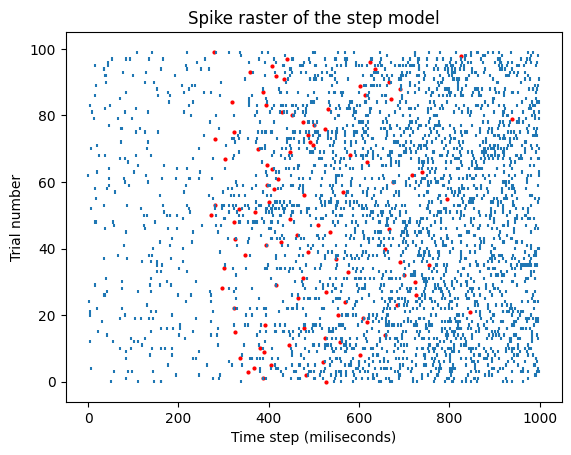

In [631]:
fig, ax = plt.subplots()

n = 100

for i, jump in enumerate(jumps[:n]):
    ax.plot(jump, i, marker='.', markersize=4, color='red')

ax.eventplot(step_list[:n])
plt.xlabel("Time step (miliseconds)")
plt.ylabel("Trial number")
plt.title("Spike raster of the step model")

plt.show()

Text(0.5, 1.0, 'Histogram of jump times')

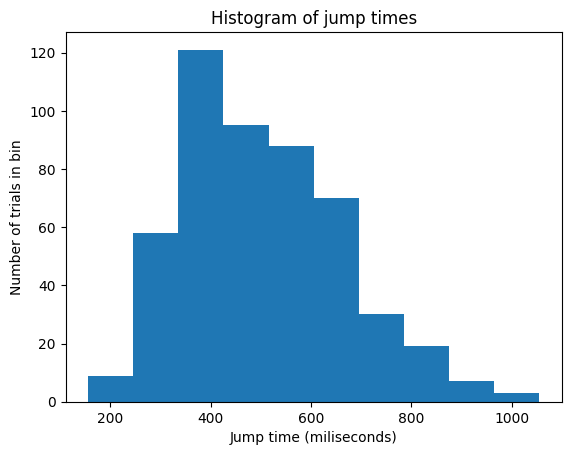

In [632]:
plt.hist(jumps, bins = 10)

plt.xlabel("Jump time (miliseconds)")
plt.ylabel("Number of trials in bin")
plt.title("Histogram of jump times")

In [633]:
jumps_A = jumps # m=500 r=10

In [634]:
jumps_B = jumps # m = 200 r = 30

Text(0.5, 1.0, 'Histogram of jump times')

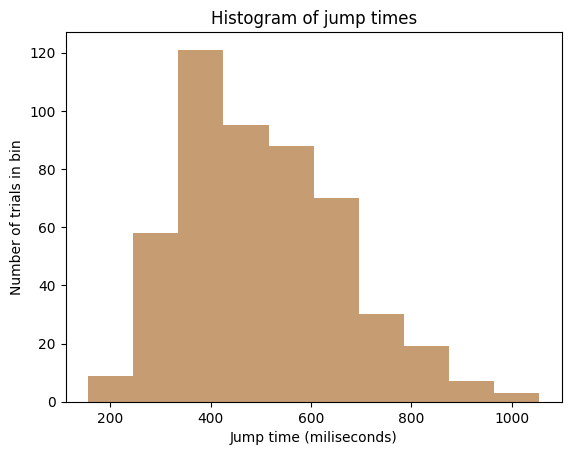

In [635]:
plt.hist(jumps_A, bins = 10, alpha = 0.5)
plt.hist(jumps_B, bins = 10, alpha = 0.5)

plt.xlabel("Jump time (miliseconds)")
plt.ylabel("Number of trials in bin")
plt.title("Histogram of jump times")

In [636]:
ramp = RampModel(beta=2, sigma=0.6)
B = ramp.simulate(Ntrials = 500, T= 1000)
ramp_spikes = B[0]
xs = B[1]
ramp_list = [np.where(ramp_spikes[i] > 0)[0].tolist() for i in range(len(ramp_spikes))]

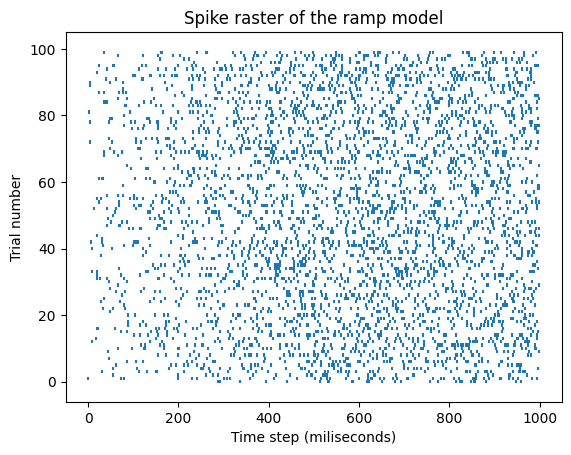

In [637]:
fig, ax = plt.subplots()

n = 100

ax.eventplot(ramp_list[:n])

plt.xlabel("Time step (miliseconds)")
plt.ylabel("Trial number")
plt.title("Spike raster of the ramp model")

plt.show()

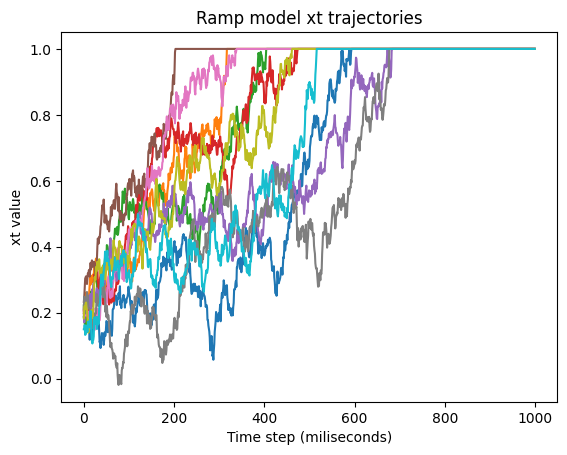

In [638]:
for i in range(10):
  plt.plot(np.arange(len(xs[0])), xs[i])

plt.xlabel("Time step (miliseconds)")
plt.ylabel("xt value")
plt.title("Ramp model xt trajectories")

plt.show()

In [639]:
upper_bound_times = []

for i in range(len(xs)):
  if 1 in xs[i]:
    upper_bound_times.append(xs[i].tolist().index(1))

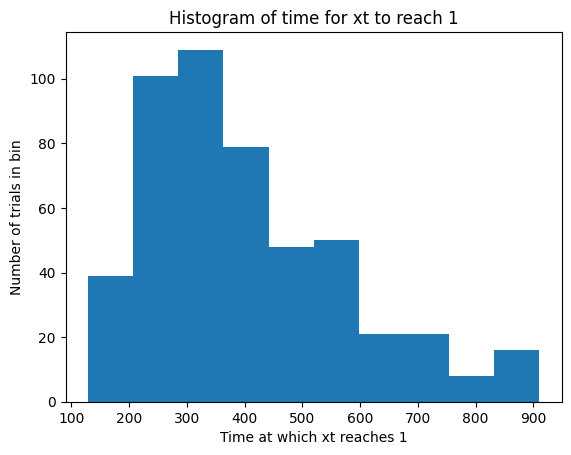

In [640]:
plt.hist(upper_bound_times, bins = 10)

plt.xlabel("Time at which xt reaches 1")
plt.ylabel("Number of trials in bin")
plt.title("Histogram of time for xt to reach 1")

plt.show()

In [641]:
upper_bound_times_A = upper_bound_times # beta = 2 sigma = 0.6

In [642]:
upper_bound_times_B = upper_bound_times # beta = 1 sigma = 0.2

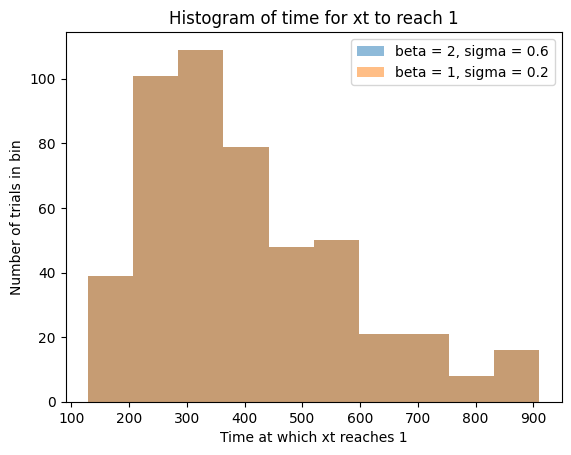

In [643]:
plt.hist(upper_bound_times_A, bins = 10, alpha = 0.5)
plt.hist(upper_bound_times_B, bins = 10, alpha = 0.5)

plt.xlabel("Time at which xt reaches 1")
plt.ylabel("Number of trials in bin")
plt.title("Histogram of time for xt to reach 1")
plt.legend(["beta = 2, sigma = 0.6", "beta = 1, sigma = 0.2"])
plt.show()

### Task 1.2

PSTH (peri-stimulus time histogram) is an important data analysis tool used in neuroscience.<br>
This  is a statistical estimate of the trial-averaged firing rate as a function of time, based on recordings of spike trains in<br>
multiple experimental trials. It is obtained by binning/histogramming spikes (e.g. using `np.histogram`) in different time bins<br>
and averaging the resulting spike counts over many trials (you can also divide by `dt` to turn mean spike counts into fiting rate, in units of Hz).<br>

Write code to construct and plot PSTH's in different regions of each model's parameter space. Note how the PSTH <br>
fluctuates randomly from dataset to dataset. It is better to do some sort of (temporal) smoothing in order to reduce these<br>
fluctuations and the jaggedness of the PSTH. You can use either a sliding window (e.g. a boxcar window/functin) averaging, or simply <br>
use time bins that are larger than the oridinal time steps (e.g. 50 milliseconds -- or 5 timesteps if you are using a `dt` of 10 ms,<br>
corresponding to `T = 100`). The smooth ramping firing rate curves in Figure 4 of the [Background](https://github.com/ahmadianlab/gg3_nda/blob/main/Background.ipynb)
are examples of smoothed PSTH's.

Even with the smoothing there will be fluctuations in the PSTH from dataset to dataset. How does the strength of these fluctuations depend on (or scale with)<br>
the number of trials (in each dataset)? Try to be quantitative about this. <br>
For the rest of this task use a high number of trials (e.g. 5000) to minimise these fluctuations. (But note <br>
that in real experiments the number of trials rarely exceeds a few hundred -- so for later tasks we will bring the number down.)


Finally, try to find parameter regimes that make the PSTH of the stepping model very close to that of the ramp model. (First make sure<br>
the ramp model's PSTH look qualitatively like the classic ramping PSTH's in the LIP experiments.) In which parameter regions<br>
does this fail drastically, and in which regimes are the two PSTH's nearly indistinguishable?

In [644]:
Ntrials = 500
T = 1000
N = 20
ramp_histograms = ramp_spikes.reshape(Ntrials, N, T//N).sum(axis = 2)
step_histograms = step_spikes.reshape(Ntrials, N, T//N).sum(axis = 2)

ramp_mean = ramp_histograms.mean(axis=0)
step_mean = step_histograms.mean(axis=0)

bin_edges = np.linspace(0, T, N+1)

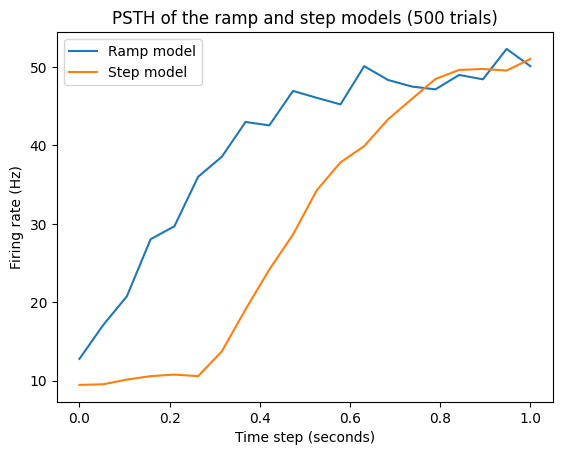

In [645]:
plt.plot(np.linspace(0, 1, 20) ,ramp_mean * N)
plt.plot(np.linspace(0, 1, 20), step_mean * N)

plt.xlabel("Time step (seconds)")
plt.ylabel("Firing rate (Hz)")
plt.title("PSTH of the ramp and step models (500 trials)")
plt.legend(["Ramp model", "Step model"])

plt.show()

The variation of the histogramed values should vary proportional to $1/\sqrt{n}$ (variance sum of independent variables)

Now we will try everything again with 5000 samples


In [646]:
step = StepModel(m=300, r=3)
A = step.simulate(Ntrials = 5000, T= 1000)
step_spikes = A[0]
jumps = A[1]
step_list = [np.where(step_spikes[i] > 0)[0].tolist() for i in range(len(step_spikes))]

ramp = RampModel(beta=1.5, sigma=0.2)
B = ramp.simulate(Ntrials = 5000, T= 1000)
ramp_spikes = B[0]
xs = B[1]
ramp_list = [np.where(ramp_spikes[i] > 0)[0].tolist() for i in range(len(ramp_spikes))]

In [647]:
Ntrials = 5000
T = 1000
N = 20

ramp_histograms = ramp_spikes.reshape(Ntrials, N, T//N).sum(axis = 2)
step_histograms = step_spikes.reshape(Ntrials, N, T//N).sum(axis = 2)

ramp_mean = ramp_histograms.mean(axis=0)
step_mean = step_histograms.mean(axis=0)

bin_edges = np.linspace(0, T, N+1)

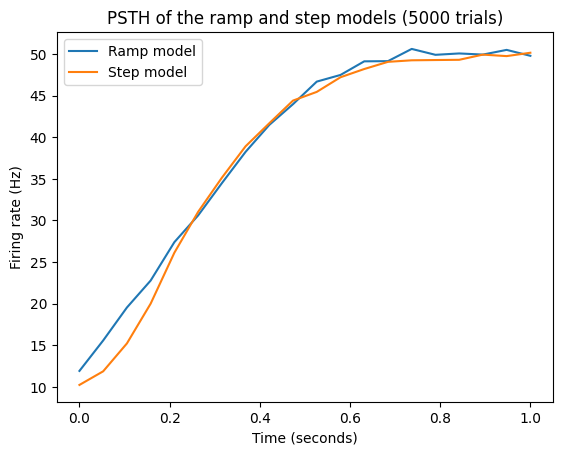

In [648]:
plt.plot(np.linspace(0, 1, 20), ramp_mean * N)
plt.plot(np.linspace(0, 1, 20), step_mean * N)

plt.xlabel("Time (seconds)")
plt.ylabel("Firing rate (Hz)")
plt.title("PSTH of the ramp and step models (5000 trials)")
plt.legend(["Ramp model", "Step model"])

plt.show()

### Task 1.3

The PSTH is an example of a so-called first-order statistic, in that it is the average of spike counts, $n_t$, which is the first moment of their marginal distribution.

You can also evaluate higher order statistics, such as the variance of $n_t$ (across trials).
(Instead of smoothing, for evaluating the variance use larger time bins -- e.g. 50 or 100 milliseconds).
However, instead of directly plotting and exploring the variance, we will plot a more useful quantity: the **Fano factor**, which is the ratio of the variance of $n_t$ to its mean (obviously both evaluated in the same time bin). This quantity is 1 for the Poisson distribution (the default choice for the emission distribution of both models).<br>
Evalute and plot the Fano Factor as a function of time, and again investigate how it changes in different parameter regimes, and importantly<br>
whether and how it behaves differently in the two models.

In [649]:
step = StepModel(m=800, r=3)
A = step.simulate(Ntrials = 5000, T= 1000)
step_spikes = A[0]
jumps = A[1]
step_list = [np.where(step_spikes[i] > 0)[0].tolist() for i in range(len(step_spikes))]

ramp = RampModel(beta=1.5, sigma=0.2)
B = ramp.simulate(Ntrials = 5000, T= 1000)
ramp_spikes = B[0]
xs = B[1]
ramp_list = [np.where(ramp_spikes[i] > 0)[0].tolist() for i in range(len(ramp_spikes))]

In [650]:
Ntrials = 5000
T = 1000
N = 20

ramp_histograms = ramp_spikes.reshape(Ntrials, N, T//N).sum(axis = 2)
step_histograms = step_spikes.reshape(Ntrials, N, T//N).sum(axis = 2)

ramp_mean = ramp_histograms.mean(axis=0)
step_mean = step_histograms.mean(axis=0)

bin_edges = np.linspace(0, T, N+1)

In [651]:
ramp_var = ramp_histograms.var(axis=0)
step_var = step_histograms.var(axis=0)

ramp_fano = ramp_var / ramp_mean
step_fano = step_var / step_mean

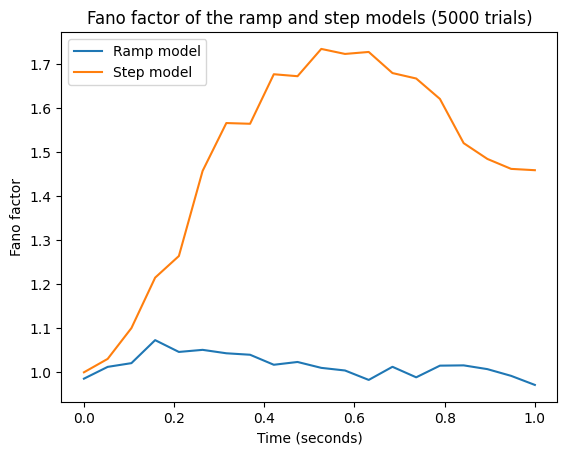

In [652]:
plt.plot(np.linspace(0, 1, 20), ramp_fano)
plt.plot(np.linspace(0, 1, 20), step_fano)

plt.xlabel("Time (seconds)")
plt.ylabel("Fano factor")
plt.title("Fano factor of the ramp and step models (5000 trials)")
plt.legend(["Ramp model", "Step model"])

plt.show()

*italicized text*### Task 1.4

(This is a more open-ended and less guided task compared to the previous ones. Use brainstorming in the group and come up with creative ideas to address this, working together.)

In this task you will explore an informal or relatively ad-hoc version of what we intend to do eventually using the systematic approach of Bayesian inference. <br>
The aim is to find an intelligent but ad-hoc (in the sense that it is not Bayesian and does not rely on the two models' likelihood function, but only relies on
observed statistics) method for telling the two models apart, i.e. deciding which model generated a dataset, ***only*** based on the spike-train dataset that the method receives (obviously without cheating, i.e. without receiving the parameters or the label of the model that generated the dataset!).

Relying on the 1st and 2nd order statistics that you have explored (or other 2nd or higher order statistics you may come up it),
construct a criterion (or multiple alternative criteria which you would then compare) for deciding between the two models.
Try to come up with criteria that are relatively robust, i.e. are not handcrafted to tell the two models apart only for fixed choices (or very limited ranges) of parameters, but nevertheless can perform decently (though not magically!) when the two models are hard to distinguishable based on the spike train statistics you explored in previous tasks.

Test your criterion by running it on several datasets generated by the two models. Use a fixed number of trials, **not more than 400**, per dataset. To generate a dataset, first sample the corresponding model parameters, uniformly at random, from the following ranges (for $\sigma$ sample $\ln \sigma$ uniformly and then exponentiate the sampled value):

$\beta \in [0, 4]$, $\ln\sigma \in [\ln(0.04), \ln(4)]$, $r \in [0.5, 6]$, $m \in [T/4, 3T/4]$, $x_0 \in [0, 0.5]$.

Quantify and report what percent of datasets generated (with different sampled parameters) from each model where classified correctly.

In [ ]:
Ndatasets = 300
Datasets = []
T = 1000
Ntrials = 400

for i in range(Ndatasets):

  beta = np.random.uniform(0, 4)
  sigma = np.exp(np.random.uniform(np.log(0.04), np.log(4)))
  r = np.random.uniform(0.5, 6)
  m = np.random.uniform(T/4, 3*T/4)
  x0 = np.random.uniform(0, 0.5)

  step = StepModel(m=m, r=r, x0 = x0)
  A = step.simulate(Ntrials = Ntrials, T= T)
  step_spikes = A[0]

  ramp = RampModel(beta=beta, sigma=sigma)
  B = ramp.simulate(Ntrials = Ntrials, T= T)
  ramp_spikes = B[0]

  Datasets.append((step_spikes, ramp_spikes))

In [ ]:
fano_list = []

for i in range(len(Datasets)):
  step_spikes = Datasets[i][0]
  ramp_spikes = Datasets[i][1]

  step_histograms = step_spikes.reshape(Ntrials, N, T//N).sum(axis = 2)
  ramp_histograms = ramp_spikes.reshape(Ntrials, N, T//N).sum(axis = 2)

  step_means = step_histograms.mean(axis=0)
  step_vars = step_histograms.var(axis=0)

  ramp_means =  ramp_histograms.mean(axis=0)
  ramp_vars = ramp_histograms.var(axis=0)

  step_fano =  step_vars / step_means
  ramp_fano =  ramp_vars / ramp_means

  fano_list.append((step_fano, ramp_fano, step_means, step_vars, ramp_means, ramp_vars))

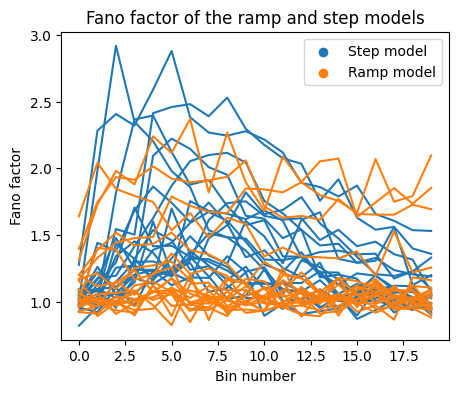

In [ ]:
n = 20

plt.figure(figsize=(5, 4))
for i in range(n):
  plt.plot(fano_list[i][0], color = "C0")

for i in range(n):
  plt.plot(fano_list[i][1], color = "C1")

plt.scatter([],[], color = "C0", label = "Step model")
plt.scatter([],[], color = "C1", label = "Ramp model")

plt.legend()
plt.xlabel("Bin number")
plt.ylabel("Fano factor")
plt.title("Fano factor of the ramp and step models")
plt.show()


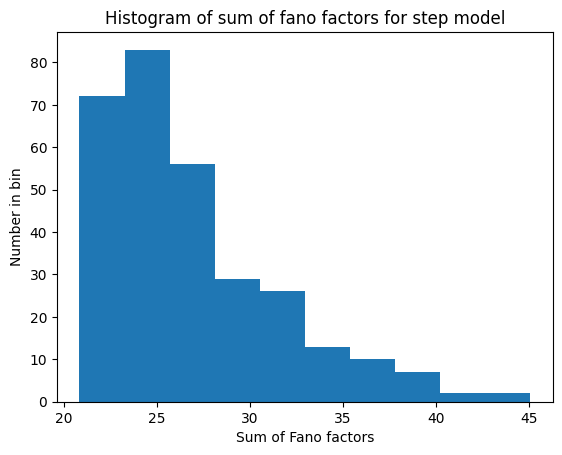

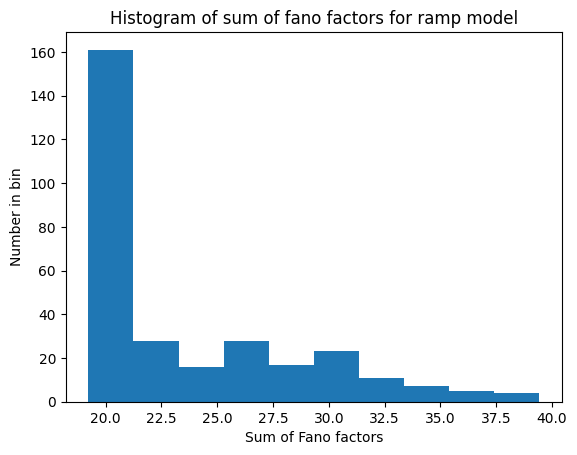

In [ ]:
step_fano_sums = []
ramp_fano_sums = []

for l in fano_list:
  step_fano_sums.append(l[0].sum(axis = 0))
  ramp_fano_sums.append(l[1].sum(axis = 0))

plt.hist(step_fano_sums)
plt.xlabel("Sum of Fano factors")
plt.ylabel("Number in bin")
plt.title("Histogram of sum of fano factors for step model")
plt.show()

plt.hist(ramp_fano_sums)
plt.xlabel("Sum of Fano factors")
plt.ylabel("Number in bin")
plt.title("Histogram of sum of fano factors for ramp model")
plt.show()


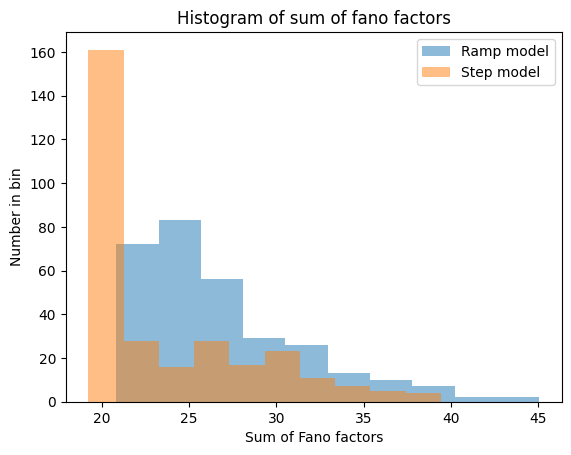

In [ ]:
step_fano_sums = []
ramp_fano_sums = []

for l in fano_list:
  step_fano_sums.append(l[0].sum(axis = 0))
  ramp_fano_sums.append(l[1].sum(axis = 0))

plt.hist(step_fano_sums, alpha = 0.5)
plt.hist(ramp_fano_sums, alpha = 0.5)

plt.xlabel("Sum of Fano factors")
plt.ylabel("Number in bin")
plt.title("Histogram of sum of fano factors")

plt.legend(["Ramp model", "Step model"])
plt.show()


In [ ]:
a = 0
b = 0

for sum in step_fano_sums:
  if sum > 23:
    a += 1

for sum in ramp_fano_sums:
  if sum <= 23:
    b += 1

print(a/len(step_fano_sums))
print(b/len(ramp_fano_sums))

0.8
0.6233333333333333


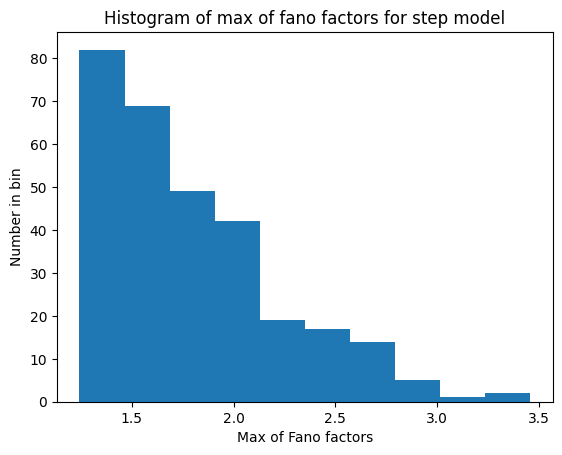

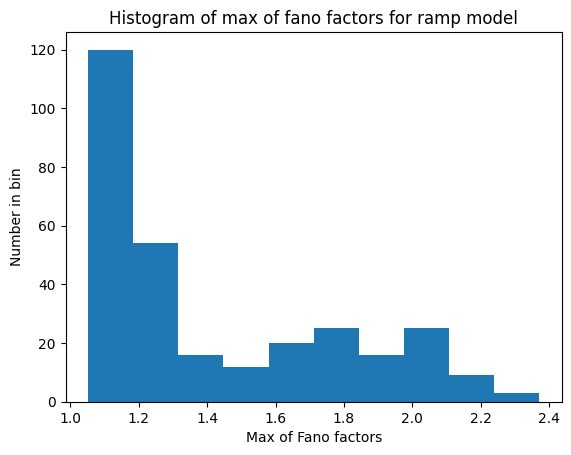

In [ ]:
step_fano_maxes = []
ramp_fano_maxes = []
step_means = []
ramp_means = []
step_vars = []
ramp_vars = []

for l in fano_list:
  step_fano_maxes.append(l[0].max(axis = 0))
  ramp_fano_maxes.append(l[1].max(axis = 0))
  step_means.append(np.mean(l[2], axis = 0))
  step_vars.append(np.mean(l[3], axis = 0))
  ramp_means.append(np.mean(l[4], axis = 0))
  ramp_vars.append(np.mean(l[5], axis = 0))

plt.hist(step_fano_maxes)
plt.xlabel("Max of Fano factors")
plt.ylabel("Number in bin")
plt.title("Histogram of max of fano factors for step model")
plt.show()
plt.hist(ramp_fano_maxes)
plt.xlabel("Max of Fano factors")
plt.ylabel("Number in bin")
plt.title("Histogram of max of fano factors for ramp model")
plt.show()


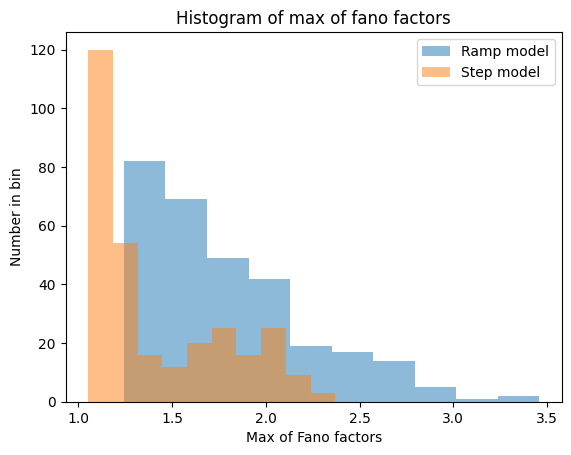

In [ ]:
plt.hist(step_fano_maxes, alpha = 0.5)
plt.hist(ramp_fano_maxes, alpha = 0.5)

plt.xlabel("Max of Fano factors")
plt.ylabel("Number in bin")
plt.title("Histogram of max of fano factors")
plt.legend(["Ramp model", "Step model"])
plt.show()


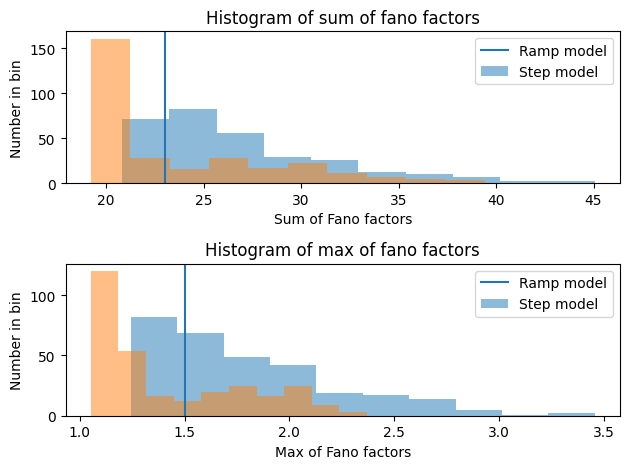

In [ ]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 1)

axs[0].hist(step_fano_sums, alpha = 0.5)
axs[0].hist(ramp_fano_sums, alpha = 0.5)

axs[0].set_xlabel("Sum of Fano factors")
axs[0].set_ylabel("Number in bin")
axs[0].set_title("Histogram of sum of fano factors")
axs[0].axvline(x=23)


axs[0].legend(["Ramp model", "Step model"])

axs[1].hist(step_fano_maxes, alpha = 0.5)
axs[1].hist(ramp_fano_maxes, alpha = 0.5)

axs[1].set_xlabel("Max of Fano factors")
axs[1].set_ylabel("Number in bin")
axs[1].set_title("Histogram of max of fano factors")
axs[1].axvline(x=1.5)

axs[1].legend(["Ramp model", "Step model"])

plt.tight_layout()
plt.show()


In [ ]:
a = 0
b = 0

for max in step_fano_maxes:
  if max > 1.5:
    a += 1

for max in ramp_fano_maxes:
  if max <= 1.5:
    b += 1

print(a/len(step_fano_maxes))
print(b/len(ramp_fano_maxes))


0.6866666666666666
0.6366666666666667


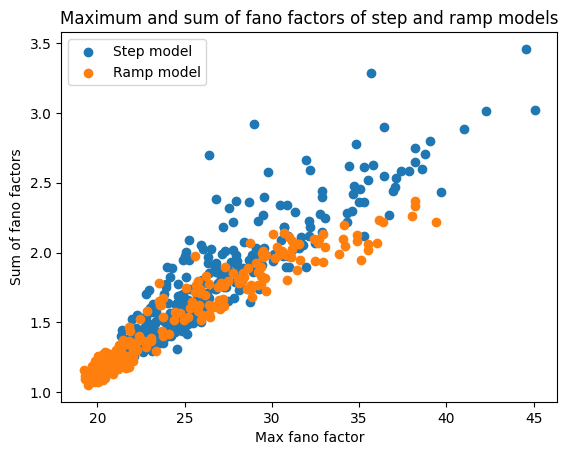

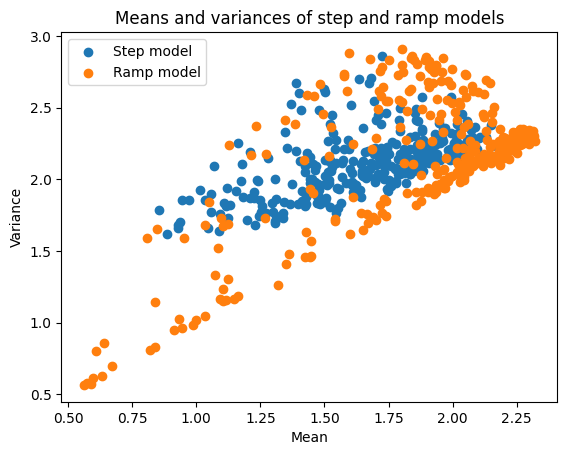

In [ ]:
plt.scatter(step_fano_sums, step_fano_maxes)
plt.scatter(ramp_fano_sums, ramp_fano_maxes)
plt.xlabel("Max fano factor")
plt.ylabel("Sum of fano factors")
plt.title("Maximum and sum of fano factors of step and ramp models")
plt.legend(["Step model", "Ramp model"])
plt.show()

plt.scatter(step_means, step_vars)
plt.scatter(ramp_means, ramp_vars)
plt.xlabel("Mean")
plt.ylabel("Variance")
plt.title("Means and variances of step and ramp models")
plt.legend(["Step model", "Ramp model"])
plt.show()


In [ ]:
from sklearn.decomposition import PCA


step_data = np.dstack((step_fano_sums, step_fano_maxes, step_means, step_vars))[0]
ramp_data = np.dstack((ramp_fano_sums, ramp_fano_maxes, ramp_means, ramp_vars))[0]

all_data = np.concatenate((step_data, ramp_data), axis=0)


all_data = all_data[~np.isnan(all_data).any(axis=1)]

pca = PCA(n_components=2)
pca_data = pca.fit_transform(all_data)


print(pca)
n = len(step_data)

step_feature1, step_feature2 = np.dsplit(np.expand_dims(pca_data[:n], axis = 0), 2)
ramp_feature1, ramp_feature2 = np.dsplit(np.expand_dims(pca_data[n:], axis = 0), 2)

step_feature1, step_feature2, ramp_feature1, ramp_feature2 = np.squeeze(step_feature1[0],1), np.squeeze(step_feature2[0],1), np.squeeze(ramp_feature1[0],1), np.squeeze(ramp_feature2[0],1)


PCA(n_components=2)


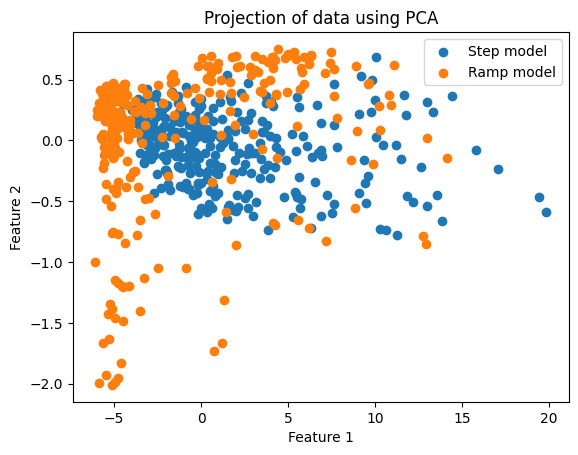

In [ ]:
plt.scatter(step_feature1, step_feature2)
plt.scatter(ramp_feature1, ramp_feature2)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Projection of data using PCA")

plt.legend(["Step model", "Ramp model"])

plt.show()

Percentage of step datasets correctly identified 0.89
Percentage of ramp datasets correctly identified 0.7966666666666666


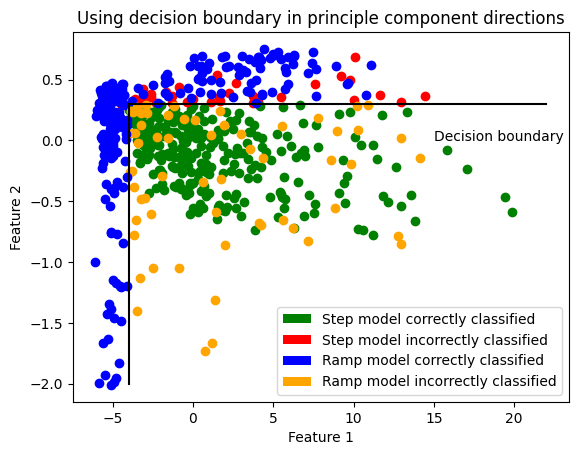

In [ ]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

a = 0
b = 0

boundary1 = -4
boundary2 = 0.3

n = len(step_feature1)

for i in range(n):
  if step_feature1[i] > boundary1 and step_feature2[i] < boundary2:
    plt.scatter(step_feature1[i], step_feature2[i], color = "green")
    a += 1
  else:
    plt.scatter(step_feature1[i], step_feature2[i], color = "red")

for i in range(len(ramp_feature1)):
  if ramp_feature1[i] <= boundary1 or ramp_feature2[i] >= boundary2:
    plt.scatter(ramp_feature1[i], ramp_feature2[i], color = "blue")
    b += 1
  else:
    plt.scatter(ramp_feature1[i], ramp_feature2[i], color = "orange")

print("Percentage of step datasets correctly identified", a/n)
print("Percentage of ramp datasets correctly identified", b/n)

legend_elements = [
    Patch(facecolor='green', label="Step model correctly classified"),
    Patch(facecolor='red', label="Step model incorrectly classified"),
        Patch(facecolor='blue', label="Ramp model correctly classified"),
    Patch(facecolor='orange', label="Ramp model incorrectly classified")

]

plt.legend(handles=legend_elements)

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Using decision boundary in principle component directions")

plt.plot([boundary1, boundary1], [boundary2, -2], color='black')  # Segment 1
plt.plot([boundary1, 22], [boundary2, boundary2], color='black')  # Segment 1
plt.text(15, 0, 'Decision boundary', color='black')

plt.show()


# Week 2
### Latent variable inference

In Week 2, your task is to formulate the two models as (time-homogeneous) **Hidden Markov Models (HMM)** with *discrete* states. To recap, <br>
a HMM is described by latent variables that are (1) temporal/sequential and (2) form a **Markov chain (MC)**.<br>
If we denote these variable at time step $t$ by $x_t$, the Markovian property means that conditioned on $x_t$, all future states<br>
$(x_{t+1}, x_{t+2}, \ldots)$ are independent of states at times before $t$.<br>
Colloquially, conditioned on the present, the future is independent of the past.<br>

In an HMM, the Markovian state variables are not directly observerd. Instead at each time, we observe an observed variable, $n_t$, which<br>
only depends of the Markov state, $x_t$, at the same time step. For us this dependence is given by the Poisson distribution describing the <br>
spike emissions, conditioned on the rates, with the latter being determined by $x_t$ (in other words, the rate at time $t$ is a<br>
deterministic instantaneous functions of $x_t$).<br> Figure 2 shows the graphical model for the HMM, with such Poisson observation (aka emission) distributions.  

Here, we aim to design Markov chains with discrete states to approximate the behavior of the latent variables of the step and ramp models.<br>
In the case of the step model, the discretization is actually exact, as the model really just has two levels of rates (although we will see that the correspondence between Markov states and possible firing rate levels is rather complicated). <br>
It is for the ramp model  that a discretization will be an approximation (since in the original formulation of this model, the state variables, $x_t$, are continuous variables).

The reason for formulating the models as discrete state HMMs is that in this case we can use the powerful and efficient
[forward-backward algorithm](https://en.wikipedia.org/wiki/Forward%E2%80%93backward_algorithm) to calculate<br>
(1) the Bayesian *posterior* estimate (the posterior mean) of the state variables, $x_t$, given the observations, $n_t$, and<br>
(2) calculate the model likelihood function,  $P(n_{1:t}|\Theta, \mathcal{M})$, i.e. the probability of the observed spike train conditioned on the model parameters $\Theta$ (for each model $\mathcal{M} = $ ramp or step).


<img src="https://github.com/ahmadianlab/gg3_nda/blob/main/figs/HMM_graph.png?raw=1" width=600/>





### Task 2.1:
**Forming an HMM approximation to the ramp model**

$\newcommand{\T}{\mathcal{T}}$

The state variable of the (original) ramp model is continuous and, because the update rule $x_{t+1} = x_t + \beta dt + \sigma\sqrt{dt}\epsilon_t$<br>
involves the Gaussian variables $\epsilon_t$, their transition probabilities $P(x_{t+1}| x_{t})$ are Gaussian (with mean and variance possibly depending on $x_t$, as well as the model parameters). Your first sub-task is to work out this distribution.

First, we will now assume $x_t$ does not go below 0. Thus if $x_t$ is currently zero, and the proposed change according to normal update rule of $x_t$ is negative, $x_t$ will remain at 0; only if the proposed change is positive it is actually implemented. (Note that this is a redefinition of the model's latent variables, it does not affect the behaviour of rates and thus spikes; and thus it does really change the model.)

Next, we will approximate $x_t$ by assuming it takes values on a regular grid of $K$ points going from 0 to 1, inclusive of both ends. Let's use $K=50$ or $K=100$.<br>
These $K$ points form the discrete states of the discrete-state HMM that approximates the original ramp model. We will denote these states by their index $s$ going from 0 to $K-1$.
The corresponding value of $x_t$ is then given by

$x_t = \frac{s_t}{K-1} \qquad \text{where} \quad s_t \in \{0, \ldots, K - 1\}$.

By evaluating the relevant probabilities, based on the Gaussian distribution you derived above, form the transition matrix for the Markov chain, defined as

$
\T_{s,s'} = P(s_{t+1}= s'| s_{t}= s)
$

Note that the state *transitioned to* (i.e. the one at $t+1$) is the column index of the matrix. Thus the rows of $\T$ have to sum up to 1.<br>
You may need to (and it certainly would not hurt to) **enforce this constraint by hand** after constructing the (intial) matrix using the evaluated Gaussian probabilities. <br>

Also note transitions out of the last state $s = K-1$ need special consideration, as according to the original model, once the variable $x$ reaches 1, it stays there.

Next, you will need to form the initial state distribution, $\pi$, as an array of $K$ values (summing to 1!) giving the probabilities of different possibilities of $s_0$. This should approximate the equation $x[0] = x_0 + \sigma\sqrt{dt} \epsilon_0$.

Once the transition matrix $\T$ and initial state distribution $\pi$ are formed, we can simulate the chain. In order to <br> do this, you will first draw $s_0$ from the initial state distribution, then successively sample from the <br>
appropriate distribution according to the transition matrix $\T$ (and depending on the current state $s_t$). To sample <br>
the discrete (integer) $s$ from a distribution over its $K$ possibilities, you can use `np.random.choice`.

For different choices of the model parameters, $\beta$, $\sigma$ and $x_0$, simulate several trials of this chain and (after appropriate rescaling) plot the trajectories $x_t$. Based on the trajectory $x_t$, calculate the firing rate trajectory $r_t$. Compare these rate trajectories with corresponding simulated rate trajectories of the original (continuous state) ramp model, to make sure your implementation is accurate *enough*.

Note that for small enough values of $\sigma$ the Markov chain approximation will produce trajectories that get stuck at the inital state. Why is this? For the case $\beta=0$, estimate, solely in terms of $K$ and $T$ (or $dt$), the *order of magnitude* (or "scaling") of the value of $\sigma$  (up to a constant of proportionality) below which trajectories tend to get stuck. In the rest of the project use values of $\sigma$ above this value, unless indicated otherwise (e.g. when use of specific ranges for parameters are instructed).

**Note:** Note also that if you use values of $\sigma$ that are too small, and depending on your code for constructing the transition matrix, your code for generating $\T$ or $\pi$ may run into numerical truncation issues resulting in `NaN` values. Something that could help is implementing things first in terms of log-probabilities, using the numerically stable function `scipy.special.logsumexp` in the normalization step (when you normalize rows of $\T$ or the vector $\pi$), and only in the end exponentiating to obtain the actual $\T$ or $\pi$.

In [ ]:
import numpy as np
from scipy.stats import norm

K = 3
beta = 0.5
sigma = 0.5
dt = 0.1
M = np.zeros((K, K))
for i in range(K-1):
  mu = i/(K-1) + beta * dt
  var = sigma ** 2 * dt
  xs = np.linspace(0, 3, K)
  cdf_vals = norm.cdf(xs, loc=mu, scale=sigma)
  p = np.concatenate((cdf_vals, [1])) - np.concatenate(([0], cdf_vals))
  p = np.concatenate(([p[0] + p[1]], p[2:]))
  M[i,:] = p
M[-1, :] = np.concatenate((np.zeros(K-1), [1]))
print(M)

[[9.98134187e-01 1.86581148e-03 1.81750781e-09]
 [9.71283440e-01 2.87160806e-02 4.79183277e-07]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]


In [ ]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

def build_ramp_hmm(beta, sigma, dt, K):
    xs = np.linspace(0, 1, K)
    edges = np.empty(K+1)
    edges[1:-1] = (xs[:-1] + xs[1:]) / 2
    edges[0], edges[-1] = -np.inf, np.inf

    T = np.zeros((K, K))
    var = sigma**2 * dt

    for s in range(K):
        mu = xs[s] + beta * dt
        cdfs = norm.cdf(edges, loc=mu, scale=np.sqrt(var))
        probs = cdfs[1:] - cdfs[:-1]
        probs /= probs.sum()
        T[s] = probs

    T[-1, :] = 0
    T[-1, -1] = 1

    return T, edges, xs

def build_initial_pi(x0, sigma, dt, edges):
    var = sigma**2 * dt
    cdfs = norm.cdf(edges, loc=x0, scale=np.sqrt(var))
    pi = cdfs[1:] - cdfs[:-1]
    pi /= pi.sum()
    return pi

def simulate_hmm_ramp(T_mat, pi, xs, Rh, n_trials, T_steps):
    K = T_mat.shape[0]
    states = np.zeros((n_trials, T_steps), int)
    x_traj = np.zeros((n_trials, T_steps))
    rates  = np.zeros((n_trials, T_steps))

    for tr in range(n_trials):
        s = np.random.choice(K, p=pi)
        states[tr, 0] = s
        for t in range(1, T_steps):
            s = np.random.choice(K, p=T_mat[s])
            states[tr, t] = s
        x_traj[tr] = xs[states[tr]]
        rates[tr]  = Rh * x_traj[tr]

    return states, x_traj, rates

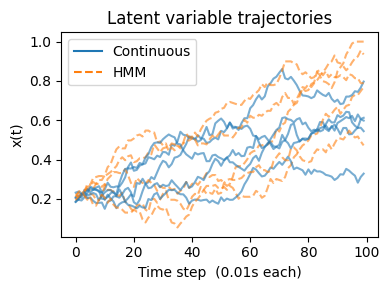

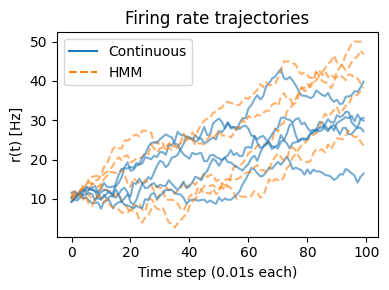

In [ ]:
beta, sigma, x0 = 0.5, 0.2, 0.2
Rh = 50.0
T_steps = 100
dt = 1.0 / T_steps
K = 200
n_trials = 5

T_mat, edges, xs = build_ramp_hmm(beta, sigma, dt, K)
pi = build_initial_pi(x0, sigma, dt, edges)

states, x_hmm, rates_hmm = simulate_hmm_ramp(T_mat, pi, xs, Rh, n_trials, T_steps)

ramp = RampModel(beta=beta, sigma=sigma, x0=x0, Rh=Rh)
spikes, x_cont, rates_cont = ramp.simulate(Ntrials=n_trials, T=T_steps, get_rate=True)

fig_x, ax_x = plt.subplots(figsize=(4, 3))

for tr in range(n_trials):
    ax_x.plot(x_cont[tr], color='C0', linestyle='-', alpha=0.6)
    ax_x.plot(x_hmm[tr], color='C1', linestyle='--', alpha=0.6)

ax_x.set_ylabel("x(t)")
ax_x.set_xlabel("Time step  (0.01s each)")
ax_x.set_title("Latent variable trajectories")
ax_x.legend(handles=[
    plt.Line2D([], [], color='C0', linestyle='-', label='Continuous'),
    plt.Line2D([], [], color='C1', linestyle='--', label='HMM')
])
fig_x.tight_layout()

fig_r, ax_r = plt.subplots(figsize=(4, 3))

for tr in range(n_trials):
    ax_r.plot(rates_cont[tr], color='C0', linestyle='-', alpha=0.6)
    ax_r.plot(rates_hmm[tr], color='C1', linestyle='--', alpha=0.6)

ax_r.set_ylabel("r(t) [Hz]")
ax_r.set_xlabel("Time step (0.01s each)")
ax_r.set_title("Firing rate trajectories")
ax_r.legend(handles=[
    plt.Line2D([], [], color='C0', linestyle='-', label='Continuous'),
    plt.Line2D([], [], color='C1', linestyle='--', label='HMM')
])
fig_r.tight_layout()
plt.show()

### Task 2.2:
**Forming an HMM approximation to the step model**

Intuitively, given its discrete (binary) rate levels, the step model can actually be exactly formulated as a discrete state HMM.<br>

First, implement a *time-homogeneous* Markov chain representing the step state with two states. How would you choose the transition probabilities?<br> Hint: think of the
parameter $p$ of the Negative Binomial distribution (see the Wikipedia article), which in terms of $m$ and $r$ is given by $r/(m+r)$.

Simulate the Markov chain for several trials and plot the corresponding $x_t$ trajectories.

Also evaluate the jump times (time-steps) and make histograms of these jump times. How do the histograms appear? Do they resemble any of the histograms of jump times<br> (i.e. histograms
for different values of $m$ and $r$) that  you made in Week 1?

What do you think is wrong with the 2-state Markov chain approximation to the step model? **§**<br>
Read about the [Negative Binomial distribution](https://en.wikipedia.org/wiki/Negative_binomial_distribution) and its "meaning" (*for the case of positive integer $r$*), to get clues for constucting an exact Markov Chain formulation of the step model (Hint: use $r + 1$ states!).**§§**

Again, simulate several trials of this new chain, plot state trajectories, and form histograms of jump times for different values of $r$. How do these compare with the histograms you obtained in Week 1 for jump times of the original step model?


**§:** An exact fomrulation of the step model is possible as a *time-inhomogenous* 2-state Markov chain (MC). You can experiment with that of course (this is optional). However, we will be using a time-homogenous HMM, and so in the above sub-task I am asking you to construct a time-homogenous Markov chain. If you did implement a time-inhomogeneous MC formulation, feel free to write about it in your final report. But make sure you do investigate the time-homogeneous version (which is in general not a correct formulation of the original model) as well, and answer the questions for that (too).

**§§:** The suggested MC implementation of the step model will differ from the Week 1 step model, in which step time had the distribution $\mathrm{NB}(\tau | m, r)$ by a time shift by $r$ time-steps.

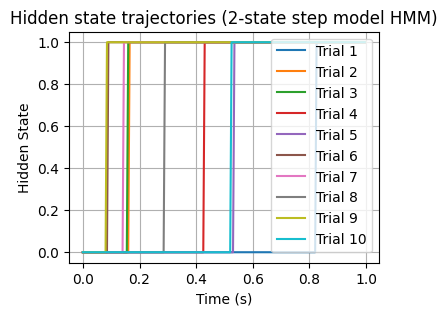

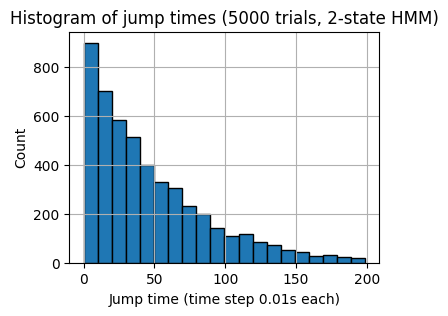

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 100
T_max = 200
N_trials = 5000
Rh = 50
x0 = 0.2
Rl = x0 * Rh

m = 50
r = 1
p = r / (m + r)

def simulate_rplus1_trials(T_max, N_trials, p, r):
    state_trajs = np.zeros((N_trials, T_max), dtype=int)
    jump_times = []

    for trial in range(N_trials):
        state = 0
        jump_time = T_max
        for t in range(T_max):
            if state < r:
                if np.random.rand() < p:
                    state += 1
            state_trajs[trial, t] = state
            if state == r and jump_time == T_max:
                jump_time = t
        jump_times.append(jump_time)

    return state_trajs, np.array(jump_times)

state_trajs, jump_times = simulate_rplus1_trials(T_max, N_trials, p, r)

rate_trajs = np.where(state_trajs < r, Rl, Rh)

time = np.arange(T_max) / T_max
plt.figure(figsize=(4, 3))
for i in range(10):
    plt.plot(time, state_trajs[i], label=f"Trial {i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Hidden State")
plt.title("Hidden state trajectories (2-state step model HMM)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))
valid_jumps = jump_times[jump_times < T_max]
plt.hist(valid_jumps, bins=20, edgecolor='black')
plt.xlabel("Jump time (time step 0.01s each)")
plt.ylabel("Count")
plt.title(f"Histogram of jump times ({N_trials} trials, 2-state HMM)")
plt.grid(True)
plt.show()

two_state_valid_jumps = valid_jumps


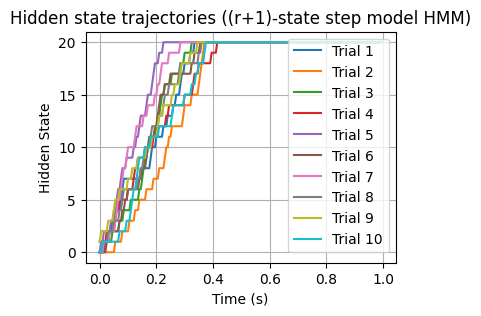

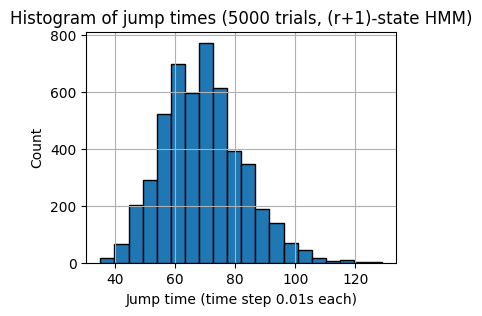

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 100
T_max = 200
N_trials = 5000
Rh = 50
x0 = 0.2
Rl = x0 * Rh

m = 50
r = 20
p = r / (m + r)

def simulate_rplus1_trials(T_max, N_trials, p, r):
    state_trajs = np.zeros((N_trials, T_max), dtype=int)
    jump_times = []

    for trial in range(N_trials):
        state = 0
        jump_time = T_max
        for t in range(T_max):
            if state < r:
                if np.random.rand() < p:
                    state += 1
            state_trajs[trial, t] = state
            if state == r and jump_time == T_max:
                jump_time = t
        jump_times.append(jump_time)

    return state_trajs, np.array(jump_times)

state_trajs, jump_times = simulate_rplus1_trials(T_max, N_trials, p, r)

rate_trajs = np.where(state_trajs < r, Rl, Rh)

time = np.arange(T_max) / T_max
plt.figure(figsize=(4, 3))
for i in range(10):
    plt.plot(time, state_trajs[i], label=f"Trial {i+1}")
plt.xlabel("Time (s)")
plt.ylabel("Hidden State")
plt.title("Hidden state trajectories ((r+1)-state step model HMM)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))
valid_jumps = jump_times[jump_times < T_max]
plt.hist(valid_jumps, bins=20, edgecolor='black')
plt.xlabel("Jump time (time step 0.01s each)")
plt.ylabel("Count")
plt.title(f"Histogram of jump times ({N_trials} trials, (r+1)-state HMM)")
plt.grid(True)
plt.show()

multi_state_valid_jumps = valid_jumps


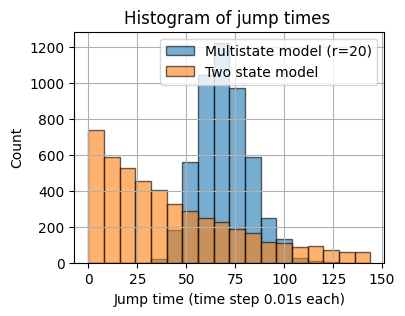

In [ ]:
plt.figure(figsize=(4, 3))
plt.hist(multi_state_valid_jumps, bins=np.arange(0, 150, 8), edgecolor='black', label="Multistate model (r=20)", alpha = 0.6)
plt.hist(two_state_valid_jumps, bins=np.arange(0, 150, 8), edgecolor='black', label="Two state model", alpha = 0.6)

plt.xlabel("Jump time (time step 0.01s each)")
plt.ylabel("Count")
plt.title(f"Histogram of jump times ")
plt.grid(True)
plt.legend()
plt.show()


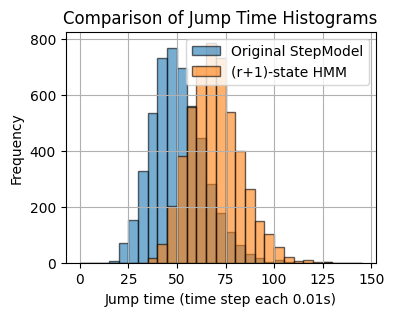

In [ ]:
step_model = StepModel(m=m, r=r, x0=x0, Rh=Rh)
_, jump_orig = step_model.simulate(Ntrials=N_trials, T=T, get_rate=False)

plt.figure(figsize=(4, 3))
plt.hist(jump_orig, bins=np.arange(0, 150, 5), alpha=0.6, label="Original StepModel", edgecolor='black')
plt.hist(multi_state_valid_jumps, bins=np.arange(0, 150, 5), alpha=0.6, label="(r+1)-state HMM", edgecolor='black')
plt.xlabel("Jump time (time step each 0.01s)")
plt.ylabel("Frequency")
plt.title("Comparison of Jump Time Histograms")
plt.legend()
plt.grid(True)
plt.show()


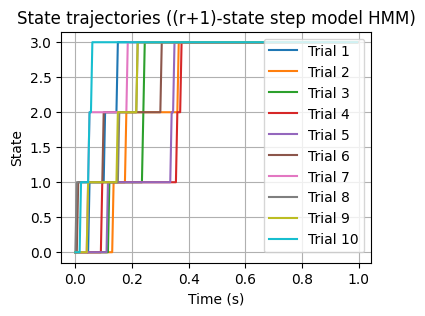

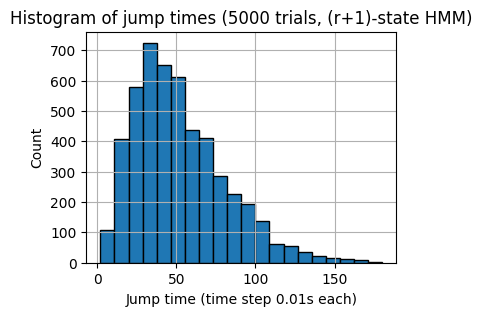

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

T = 100
T_max = 200
N_trials = 5000
Rh = 50
x0 = 0.2
Rl = x0 * Rh

m = 50
r = 3
p = r / (m + r)

def simulate_rplus1_trials(T_max, N_trials, p, r):
    state_trajs = np.zeros((N_trials, T_max), dtype=int)
    jump_times = []

    for trial in range(N_trials):
        state = 0
        jump_time = T_max
        for t in range(T_max):
            if state < r:
                if np.random.rand() < p:
                    state += 1
            state_trajs[trial, t] = state
            if state == r and jump_time == T_max:
                jump_time = t
        jump_times.append(jump_time)

    return state_trajs, np.array(jump_times)

state_trajs, jump_times = simulate_rplus1_trials(T_max, N_trials, p, r)

rate_trajs = np.where(state_trajs < r, Rl, Rh)

time = np.arange(T_max) / T_max
plt.figure(figsize=(4, 3))
for i in range(10):
    plt.plot(time, state_trajs[i], label=f"Trial {i+1}")
plt.xlabel("Time (s)")
plt.ylabel("State")
plt.title("State trajectories ((r+1)-state step model HMM)")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(4, 3))
valid_jumps = jump_times[jump_times < T_max]
plt.hist(valid_jumps, bins=20, edgecolor='black')
plt.xlabel("Jump time (time step 0.01s each)")
plt.ylabel("Count")
plt.title(f"Histogram of jump times ({N_trials} trials, (r+1)-state HMM)")
plt.grid(True)
plt.show()

r3 = valid_jumps

### Task 2.3:
**Inference of hidden states**

Henceforth, for the rest of the activities this week (as well as most of the activities of the next two weeks), we will be solely working with the discrete-state HMM versions of the two models that you have implemented (instead of using the `models.py` simulators). We will also limit the values of the parameter $r$ to positive integers.

The `hmm_expected_states` function (see its doc/help) in the `inference.py` (run the next code cell to import this on Colab **§**) module implements the forward-backward algorithm (FBA) to calculate the posterior probabilities $P(s_t | n_{1:T})$, as well as the log-likelihood $\ln P(n_{1:T})$.**§§**<br>
One of the inputs to `hmm_expected_states` is the array, `ll`, of the logs of the conditional observation probabilities $ll[t, s] = \log P(n_t|s_t = s)$.**§§§** Use the function `inference.poisson_logpdf` from the provided new module `inference.py`, to construct this array based on the observed spike counts of one or several trials (see the help of this function).



Use this function to obtain the posterior probabilities, $P(s_t | n_{1:T})$, for your finite-state HMM implementations of both models.**§§§§**

- Write code to calcualte the posterior expectation of $x_t$ (i.e. $\mathbb{E}[x_t | n_{1:T}]$), for the ramp model, based on the posterior probabilities $P(s_t | n_{1:T})$. Generate several trial spike trains using the discrete-state HMM ramp model (with the corresponding $x_t$ trajectories retained), and for each trial infer and plot $\mathbb{E}[x_t | n_{1:T}]$, together with the ground-truth simulated $x_t$. Repeat this in different regions of model parameter space (including low and high values of $x_0$ and $R_h$). In what parameter regimes is the inference more accurate, and vice versa? Provide intuitive/qualitative explanations for your observations.

- Repeat the above for the step model, with the following modifications. The aspect of the step model's hidden states that we really care about is whether or not the ''neuron" has jumped to the upper rate level. Calculate the probability of being in the upper rate level based on the posterior state probabilities $P(s_t | n_{1:T})$, and again make plots of it for various simulated spike-train trials. Visualise the true jump time on these plots. You can take the time point when the posterior probability of being in the upper rate level exceeds 0.5 as the estimated/inferred jump time, and mark that on the plots as well.<br>
For your report, try to combine different trials in one plot or figure, in a compact but nice way.<br> Based on these plots, comment (include both accounts of your observations and your qualitative explanations for them) on the accuracy  of the inference in different regions of the model parameter space.

- The `hmm_expected_states` function has an optional boolean input `filter` which is false by default. When true, the function calculates $P(s_t | n_{1:t})$ instead of $P(s_t | n_{1:T})$: i.e. the posterior conditioned only on observations up to and including the "current" time-step $t$. This corresponds to the so-called filtering problem (as in the Kalman filter; the default case, `filter = False`, corresponds to "smoothing"). Filtering is appropriate for applications where inference has to be performed online, in which case, to infer $x_t$ we do not have the luxury of having access to future observations -- without a time-machine, that is! In our case (as engineers studying the computational mechanisms in area LIP), we do of course have access to the entire spike-train; hence the default option. Nevertheless, carry out a theoretical study of the differences in inference accuracy, for both models, using smoothing vs. filtering. What qualitative differences do you observe between the inference accuracy using filtering vs. smoothing?

In all of the above sub-tasks,  quantiatify the latent-state inference accuracy by evaluating the average error (both over trials and over time, if the latter makes sense) of the posterior estimates of the $x_t$ trajectories (for the ramp model) or the jump times (for the step model). You can then make heatmap or contour plots of these errors as a function of two parameters -- and different plots for different choices of parameter pairs. (The `tricontourf` function of `matplotlib` is very useful for this purpose.)

______________________________________________________________________________________________________________________________________
**§:** The module `inference.py` makes use of the [Numba package](http://numba.pydata.org/) to speed up computations by so-called just-in-time (JIT) compilation.  Numba can be imported in Colab, but to use it locally, you will need to install it, following these [instructions](https://numba.readthedocs.io/en/stable/user/installing.html).
Also note that JIT makes a function run slowly the first time you use it. So the first time you run a JITed function (e.g. `hmm_expected_states`) it's better to run it on a "light" test case (e.g. a single spike train, rather than several spike trains, or on a short one), and only then run it for the true use case.  


**§§:** This (log) probability depends implicitly on model parameters, hence the name (log) likelihood; it is called `normalizer` in the code for reasons having to do with the fact that it normalizes the message products involved in the FBA.

**§§§:** Note that at inference time, the $n_t$ are known and fixed, but the MC states are unknown; thus, as part of the inference procedure, we need to evaluate the observation (log-)probabilities for *all* possible states, $s$, at *every* times $t$. For more details see my [notes on the FBA](https://github.com/ahmadianlab/gg3_nda/blob/main/fwdbwd.ipynb).


**§§§§:** Note that the observed spike trains used here (and later in Weeks 3 & 4) should be generated using the discrete-state HMM version of the two models. For this, first generate the latent variables as in tasks 2.1 and 2.2, and calculate the firing rates, $r_t$, based on them. Then, given the rates, sample the spike counts, $n_t$, from the corresponding Poisson distribution (you can look up how this was done in `models.py`).


In [ ]:
mode = "colab" # change this to "local" if you are on your own computer

if mode == "local":
    import inference
elif mode == "colab":
    import requests
    url = 'https://github.com/ahmadianlab/gg3_nda/blob/main/inference.py?raw=true'
    r = requests.get(url)
    with open('inference.py', 'w') as f:
        f.write(r.text)
    import inference
    from inference import *
else:
    raise Exception("mode must be either local or colab")

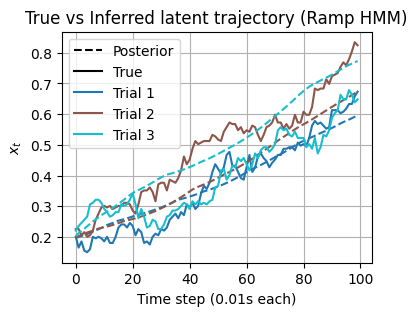

In [ ]:
T = 100
dt = 1 / T
K = 200
beta = 0.5
sigma = 0.2
x0 = 0.2
Rh = 50
N_trials = 3

colors = plt.cm.tab10(np.linspace(0, 1, N_trials))  # or use plt.rcParams['axes.prop_cycle']

plt.figure(figsize=(4, 3))
plt.xlabel("Time step (0.01s each)")
plt.ylabel("$x_t$")
plt.title("True vs Inferred latent trajectory (Ramp HMM)")
plt.grid(True)

plt.plot([], [], linestyle='--', color='black', label='Posterior')
plt.plot([], [], color='black', label='True')

for i in range(N_trials):
  T_matrix, edges, xs = build_ramp_hmm(beta, sigma, dt, K)
  pi = build_initial_pi(x0, sigma, dt, edges)

  s_t = np.zeros(T, dtype=int)
  s_t[0] = np.random.choice(K, p=pi)
  for t in range(1, T):
      s_t[t] = np.random.choice(K, p=T_matrix[s_t[t - 1]])

  x_true = xs[s_t]
  rate = Rh * x_true

  spikes = np.random.poisson(rate * dt)

  lambdas = Rh * xs * dt # shape (K,)
  ll = poisson_logpdf(spikes.astype(int), lambdas)  # shape (T, K)

  posterior, logZ = hmm_expected_states(pi, T_matrix, ll)
  x_inferred = np.sum(posterior * xs[None, :], axis=1)

  color = colors[i]
  plt.plot(x_true, label="Trial " + str(i + 1), color=color)
  plt.plot(x_inferred, linestyle="--", color=color)

plt.legend()
plt.show()




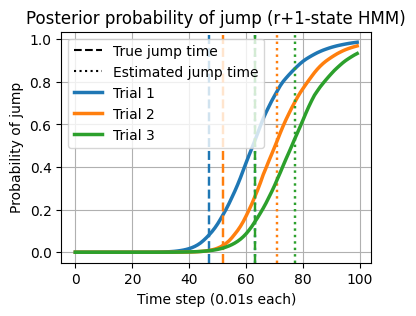

In [ ]:
T = 100
dt = 1 / T
N_trials = 3
Rh = 50
x0 = 0.2
Rl = x0 * Rh
m = 50
r = 10
p = r / (m + r)
K = r + 1

plt.figure(figsize=(4, 3))
plt.xlabel("Time step (0.01s each)")
plt.ylabel("Probability of jump")
plt.title("Posterior probability of jump (r+1-state HMM)")
plt.grid(True)
plt.plot([], [], linestyle='--', color='black', label='True jump time')
plt.plot([], [], linestyle=':', color='black', label='Estimated jump time')

for trial in range(N_trials):
    state_trajs, jump_times = simulate_rplus1_trials(T, N_trials, p, r)
    state_traj = state_trajs[0]
    true_jump_time = jump_times[0]

    rate = np.where(state_traj < r, Rl, Rh)
    spikes = np.random.poisson(rate * dt)

    pi = np.zeros(K)
    pi[0] = 1.0

    T_matrix = np.zeros((K, K))
    for s in range(K - 1):
        T_matrix[s, s] = 1 - p
        T_matrix[s, s + 1] = p
    T_matrix[r, r] = 1.0

    lambdas = np.linspace(Rl, Rh, K) * dt
    ll = poisson_logpdf(spikes.astype(int), lambdas)

    posterior, _ = hmm_expected_states(pi, T_matrix, ll)
    jump_probs = posterior[:, r]
    estimated_jump_time = np.argmax(jump_probs > 0.5)

    line, = plt.plot(jump_probs, label=f"Trial {trial + 1}", linewidth=2.5)
    color = line.get_color()

    # Use the same color for the vertical lines
    plt.axvline(true_jump_time, linestyle='--', color=color, linewidth=1.75)
    plt.axvline(estimated_jump_time, linestyle=':', color=color, linewidth=1.75)

plt.legend()
plt.show()

# Week 3

This week we will proceed to the inference of model parameters (aka learning or fitting of model parameters), and preliminary model selection.

For Bayesian inference of parameters, we would like to compute the posterior distribution over model parameters, $\Theta$, given a *dataset* of observed spike trains:

$P(\Theta\, |\, \mathrm{data}\!=\!\{(n_t)_{t=1}^T\}, \mathcal{M})$

where the observed data are the set of spike trains in multiple trials and $\mathcal{M}$ ($ =$ *ramp* or *step*) denotes the model. According to the Bayes rule<br>


$P(\Theta| \mathrm{data}, \mathcal{M}) \propto P(\mathrm{data}|\Theta, \mathcal{M}) P(\Theta| \mathcal{M}), \qquad\qquad$             **(3.1)**

where $P(\Theta| \mathcal{M})$ is the prior distribution over parameters and $P(\mathrm{data}|\Theta, \mathcal{M})$ is the model's likelihood function.<br>
Calculating the posterior distribution is hard  in general, since the  expression on the right hand side of Eq. (3.1)<br>
is not normalized (below we will refer to this expression  as the **unnormalized posterior**), and calculating <br>
the normalization constant requires integrating or summing over the possibly high-dimensional space of parameters.  <br>
The same is true if we want to calculate the expectation of some function of the parameters (in particular their posterior expectation $\mathbb{E}[\Theta| \text{data}, \mathcal{M}]$):
again we have to integrate over the parameters.<br>
In general, the computational cost of this integration grows exponentially in the number of parameters
(or the dimension of parameter space). Thus Bayesian methods almost inevitably rely on one or another type of approximation
 for calculating the posterior.

In our project, the models have only 3 unknown parameters to be inferred, and the above problem is not prohibitive.
However, if, e.g., we approximate the integral by a sum over a discretized 3D grid of points, such that the grid partitions
 each parameter's range of values (as determined by the prior) into, say, only $M = 10$ sub-intervals, we will have to sum
over $M^3$ points, which requires $M^3 = 1000$ evaluations of the likelihood. <br>
In our case, at each point of the grid, the likelihood or its logarithm, can be calculated using the forward pass
of the forward-backward algorithm (those curious about the details: see the section Model Log-likelihood of the [notes on the FBA](https://github.com/ahmadianlab/gg3_nda/blob/main/fwdbwd.ipynb)).
Note that this requires order $T$ matrix multiplications, each involving order $K^2$ arithmetic operations for $K$ Markov states;
thus evaluation of the log-likelikehood for each value of parameters has cost $O(K^2 T)$.
Thus computing the likelihood is relatively expensive (even if on our laptops it can be evaluated in a fraction of a second),
and evaluating the posterior on such a grid has computational cost $O(M^d K^2 T)$, where for us $d=3$, though, in some of the tasks below, $d=2$.                                                                                                                

Use the function `hmm_normalizer` of `inference.py` to calculate the model **log-** likelihood using the forward pass.

**Prior distributions:**
Unless instructed otherwise, use a uniform prior distribution on the parameters, on specified ranges. For $\sigma$ of the ramp model<br>
it will be more sensible to use a uniform prior on its logarithm. In fact, to make things easier you should work with $\ln \sigma$, when<br>
evaluating the unnormalized posterior, and in the grid method, construct the (regular) grid for $\ln \sigma$, instead of $\sigma$ <br>
(but obviously exponentiate $\ln \sigma$ when passing to your likelihood function, and when calculating posterior estimates of the parameters<br>
calculate the posterior mean or error of the exponential of the $\ln \sigma$ values). Sensible ranges are as follows:

$\beta \in [0, 4]$

$\ln\sigma \in [\ln(0.04), \ln(4)]$

$r \in \{1,2, \ldots, 6\}$

$m \in [0, 3T/4]$

$x_0 \in [0, 0.5]$

**Hyperparameters:** Unless otherwise stated, use $T = 100$ and for the ramp model: $K = 100$.

#### Note on the step model's likelihood evaluation:
Before we proceed to the tasks, a note on the $K = r + 1$ hidden-state HMM implementation of the step model (you can ignore this note<br>
if you have opted to use the time-inhomogeneous Markov chain implementation instead). As you may have noted,<br>
the jump times in the $(r+1)$-state implementation will have a delay of $r$ steps compared to the draws form the $\mathrm{NB}(m, r)$ distribution<br>
as used in Week 1. For simulating a trial with $T$ time steps, this issue can be dealt with by a time-shift,<br>
at the expense of simulating the Markov chain for $r$ extra steps: simulate $T+r$ steps but only consider the last $T$ steps,<br>
and only generate spikes in those final $T$ steps.<br>
This week, however, we would like to evaluate the likelihoods of the two models, on the *same* set of spike trains <br>
on the interval $t = 1:T$, using the forward pass of FBA. In this case, the necessary compensation for the extra, observation-less<br>
$r$ steps can be made by the following modification to the input argument `ll` that you will pass to the function `hmm_normalizer`:  <br>

- evaluate this array as normal, as the $T \times K$ matrix of observed probabilities of $n_{1:T}$ in all possible hidden states.<br>
- then prepend $r$ rows with all elements equal to 0 to the top of this matrix to make it a $(r+T)\times K$ matrix instead.

(If curious, you can verify that this is the correct way of generalizing the forward pass to  cases with "missing observations" by inspecting<br>
the [details of the forward pass](https://github.com/ahmadianlab/gg3_nda/blob/main/fwdbwd.ipynb).) Note that this compenstation
is exactly equivalent to running the forward pass on the original $T$ steps (that have spike observations), but using $\mathcal{T}^{r} \pi$ --where $\mathcal{T}$
is transition matrix--<br> as the initial Markov chain probability distribution instead of $\pi$. (This second method is actually computationally preferable,
since --for a given values of $r$ or $m$-- you calculate $\mathcal{T}^{r} \pi$ once, before using it in the FWA to be run on all spike trains.)

### Task 3.1
**Grid approximation**

We will start this task by fixing the value of $x_0$ to 0.2 (for both models); so we will not infer it, but  assume it known.<br>
Construct a regular 2D grid on each model's parameter space (on the ranges given above, and using $\ln \sigma$ instead of $\sigma$) with $M$ grid points along each coordinate axis,<br>
thinking of each grid point as <u>*the center*</u> of its "assigned" sub-interval.<br>
Start by relatively high values of $M$, e.g. $M=30$.<br>

(For one calculation of the posterior over all grid points, going to higher $M$'s is also feasible, but since you want to experiment and explore with different parameters <br>
 and hyperparameters, you should compromise on using higher values of $M$. But ultimately use your own judgement, in particular by using $M < 30$ if necessary. <br>
Similarly, in the sub-tasks below, make reasonable choices of the number of different cases of true parameters, etc., that you explore.<br>
It is probably wise to start small-scale, in a first pass through all sub-tasks, and after you have a rough overview of computational times, inference behaviour, etc,<br>
do  more thorough final runs going over a larger number of possibilities and/or using higher $M$ values, which would take longer to compute.)

For each model simulate a dataset of $N_{\rm trial}$ spike trains, and for each dataset, evaluate *that* model's log-likelihood on all grid points<br>
(by summing the log-likelihood of all trials), and form the *normalized* posterior by using Bayes' rule Eq. (3.1).

**3.1.1:** Visualize the (approximate) posterior on the grid (e.g. using `plt.imshow`) with a  super-imposed point representing the true parameters. <br>
Repeat for different true parameter values (within the ranges of the prior distribution) and for different number of trials (over a range from 1 to 400). <br>
Document your observations of systematic dependence of the posterior on the number of trials. Similarly, note any systematic changes in behaviour<br>
for different values of the true parameters.

**3.1.2:** In addition to visualisation, evaluate the posterior expectations of the parameters as their estimates, as well as their posterior standard deviations (as measures of their<br>
posterior uncertainties or  "error bars" for their estimates).  Given the true parameter value, you can also evaluate the actual estimation error of different parameters, <br>
for  dataset of different sizes (different number of trials) or choices of true parameters (averaging the error over a few, even just 2-3, datasets when $N_{trial}$ is low). <br>
Make appropriate plots.

Also quantitatively compare the estimation errors with the posterior uncertainties of different parameters.
What do you expect for this relationship, and what do you observe?

In [ ]:
def generate_step_hmm(r, m, T, Rh, x0=0.2):
    dt = 1 / T
    p = r / (m + r)
    K = r + 1
    Rl = x0 * Rh

    pi = np.zeros(K)
    pi[0] = 1.0

    T_matrix = np.zeros((K, K))
    for s in range(K - 1):
        T_matrix[s, s] = 1 - p
        T_matrix[s, s + 1] = p
    T_matrix[r, r] = 1.0

    lambdas = np.concatenate([np.full(K - 1, Rl), [Rh]]) * dt

    return T_matrix, pi, lambdas

In [ ]:
from tqdm.notebook import tqdm

N_trials = 3
T = 100

In [ ]:
def generate_step_trial_ll(r, m, spikes, T = 100, x0 = 0.2, Rh = 50):
  K = r + 1
  T_matrix, pi, lambdas = generate_step_hmm(r, m, T, Rh, x0)
  ll = poisson_logpdf(spikes.astype(int), lambdas)
  ll_0 = np.vstack([np.zeros((r, K)), ll])
  A = hmm_normalizer(pi, T_matrix, ll_0)
  #pi = np.linalg.matrix_power(T_matrix, r) @ pi
 # B = hmm_normalizer(pi, T_matrix, ll)
  return A

In [ ]:
def generate_ramp_trial_ll(beta, sigma, spikes, T = 100, K = 50, x0 = 0.2, Rh = 50):
  dt = 1 / T
  T_matrix, edges, xs = build_ramp_hmm(beta, sigma, dt, K)
  pi = build_initial_pi(x0, sigma, dt, edges)

  lambdas = Rh * xs * dt
  ll = poisson_logpdf(spikes.astype(int), lambdas)

  A = hmm_normalizer(pi, T_matrix, ll)
  return A

In [ ]:
def find_step_log_likelihood(r, m, spikes, N_trials = 50, x0 = 0.2):
  log_likelihood = 0
  for i in range(N_trials):
    log_likelihood += generate_step_trial_ll(r = r, m = m, x0= x0, spikes = spikes[i])
  return log_likelihood

In [ ]:
def find_ramp_log_likelihood(beta, sigma, spikes, N_trials = 50, x0 = 0.2):
  log_likelihood = 0
  for i in range(N_trials):
    log_likelihood += generate_ramp_trial_ll(beta = beta, sigma = sigma, x0 = x0, spikes = spikes[i])
  return log_likelihood

In [ ]:
def generate_step_spikes(r, m, Rh = 50, N_trials = 10, T = 100, x0 = 0.2):
  dt = 1 / T
  K = r + 1
  step_spikes = np.zeros((N_trials, T))
  for i in range(N_trials):
    T_matrix, pi, lambdas = generate_step_hmm(r, m, T, Rh, x0)
    s_t[0] = np.random.choice(K, p=pi)
    for t in range(1, T):
        s_t[t] = np.random.choice(K, p=T_matrix[s_t[t - 1]])
    rate_trajs = lambdas[s_t]
    #state_trajs, jump_times = simulate_rplus1_trials(T, N_trials, p, r)
    #state_traj = state_trajs[0]
    spikes = np.random.poisson(rate_trajs)
    step_spikes[i] = spikes
  return step_spikes

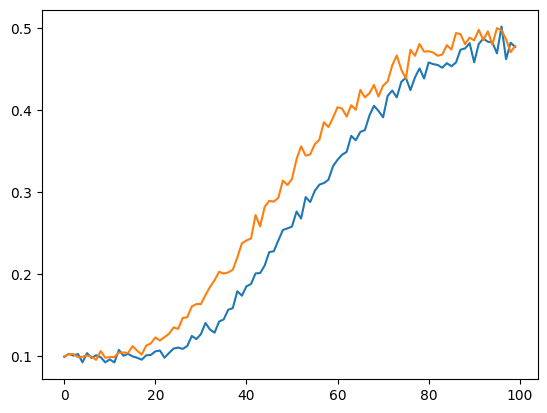

In [ ]:
A = generate_step_spikes(r=7, m=50, Rh=50, N_trials=5000, T=100, x0=0.2).mean(axis=0)
step = StepModel(m=50, r=7, x0=0.2, Rh=50)
step_spikes, _ = step.simulate(Ntrials=5000, T=T, get_rate=False)
B = step_spikes.mean(axis=0)
plt.plot(A)
plt.plot(B)

In [ ]:
def generate_ramp_spikes(beta, sigma, Rh = 50, N_trials = 10, T = 100, x0 = 0.2):
  dt = 1 / T
  K = r + 1
  ramp_spikes = np.zeros((N_trials, T))
  for i in range(N_trials):
    T_matrix, edges, xs = build_ramp_hmm(beta, sigma, dt, K)
    pi = build_initial_pi(x0, sigma, dt, edges)
    s_t = np.zeros(T, dtype=int)
    s_t[0] = np.random.choice(K, p=pi)
    for t in range(1, T):
        s_t[t] = np.random.choice(K, p=T_matrix[s_t[t - 1]])
    x_true = xs[s_t]
    rate = Rh * x_true
    spikes = np.random.poisson(rate * dt)
    ramp_spikes[i] = spikes
  return ramp_spikes

In [ ]:
def step_trials(step_spikes, x0 = 0.2, Rh = 50, T = 100, N_trials = 10, M = 30):
  #step_spikes = generate_step_spikes(r, m, Rh = Rh, N_trials = N_trials, T = T, x0 = x0)
  log_likelihood_step = np.zeros((6, M))

  for i, r_ in enumerate((range(1, 7))):
    for j, m_ in enumerate(np.linspace(1, 3*T/4, M)):
      log_likelihood_step[i, j] = find_step_log_likelihood(r = int(r_), m = int(m_), spikes = step_spikes, N_trials = N_trials)

  return log_likelihood_step

In [ ]:
def ramp_trials(ramp_spikes, x0 = 0.2, Rh = 50, T = 100, N_trials = 10, M = 30):
  #ramp_spikes = generate_ramp_spikes(beta, sigma, Rh = Rh, N_trials = N_trials, T = T, x0 = x0)

  log_likelihood_ramp = np.zeros((M, M))

  for i, beta_ in enumerate((np.linspace(0, 4, M))):
    for j, logsigma_ in enumerate(np.linspace(np.log(0.04), np.log(4), M)):
      log_likelihood_ramp[i, j] = find_ramp_log_likelihood(beta = beta_, sigma = np.exp(logsigma_), spikes = ramp_spikes, N_trials = N_trials)
  return log_likelihood_ramp

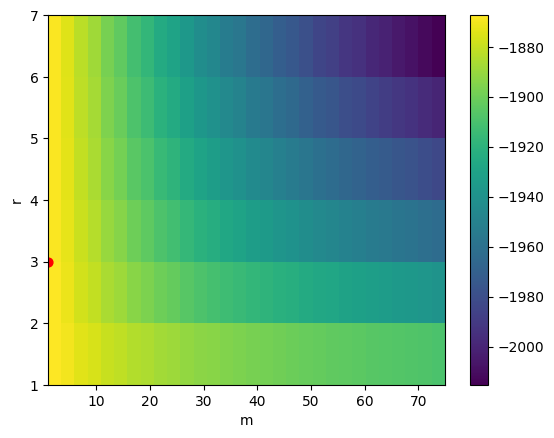

Step model:
  E[r]: 2.8443, Var[r]: 3.0125
  E[m]: 1.0688, Var[m]: 0.1783


In [ ]:
import numpy as np
from scipy.special import logsumexp

def calculate_step_model_posterior(M, T, N_trials, m, r, plot = False):
    
    #step_spikes = generate_step_spikes(r = r, m = m, Rh = 50, N_trials = N_trials, T = T, x0 = 0.2)
    step = StepModel(m=m, r=r, x0=0.2, Rh=50)
    step_spikes, _ = step.simulate(Ntrials=N_trials, T=T, get_rate=False)

    log_likelihood_step = step_trials(step_spikes, N_trials=N_trials)
    log_prior_step = np.log(1/(6*M))
    log_posterior_step = log_likelihood_step + log_prior_step

    if plot:
        img = plt.imshow(log_posterior_step, origin='lower', extent=[1, 3*T/4, 1, 7], aspect='auto')
        plt.xlabel("m")
        plt.ylabel("r")
        plt.scatter([m], [r], color='red', s=40)
        plt.colorbar(img)
        plt.show()

    r_values = np.array(range(1,7))
    m_values = np.linspace(1, 3*T/4, M)
    r_mat, m_mat = np.meshgrid(r_values, m_values, indexing='ij')

    log_denominator = logsumexp(log_likelihood_step)

    # ---- r: mean and variance ----
    log_weighted_r = np.log(r_mat + 1e-12) + log_likelihood_step
    log_weighted_r2 = np.log(r_mat**2 + 1e-12) + log_likelihood_step

    log_mean_r = logsumexp(log_weighted_r) - log_denominator
    log_mean_r2 = logsumexp(log_weighted_r2) - log_denominator

    mean_r = np.exp(log_mean_r)
    var_r = np.exp(log_mean_r2) - mean_r**2

    # ---- m: mean and variance ----
    log_weighted_m = np.log(m_mat + 1e-12) + log_likelihood_step
    log_weighted_m2 = np.log(m_mat**2 + 1e-12) + log_likelihood_step

    log_mean_m = logsumexp(log_weighted_m) - log_denominator
    log_mean_m2 = logsumexp(log_weighted_m2) - log_denominator

    mean_m = np.exp(log_mean_m)
    var_m = np.exp(log_mean_m2) - mean_m**2

    print(f"Step model:")
    print(f"  E[r]: {mean_r:.4f}, Var[r]: {var_r:.4f}")
    print(f"  E[m]: {mean_m:.4f}, Var[m]: {var_m:.4f}")

    return log_posterior_step

_ = calculate_step_model_posterior(M = 30, T = 100, N_trials = 20, m = 1, r = 3, plot=True)

Step model:
  E[r]: 3.3906, Var[r]: 2.9696
  E[m]: 1.4936, Var[m]: 1.2319
Step model:
  E[r]: 3.3984, Var[r]: 3.0439
  E[m]: 1.6872, Var[m]: 2.7956
Step model:
  E[r]: 3.4143, Var[r]: 2.9605
  E[m]: 1.1928, Var[m]: 0.5066
Step model:
  E[r]: 1.0029, Var[r]: 0.0030
  E[m]: 44.6312, Var[m]: 168.7062
Step model:
  E[r]: 2.4636, Var[r]: 1.3810
  E[m]: 56.9411, Var[m]: 99.7002
Step model:
  E[r]: 4.6574, Var[r]: 1.4932
  E[m]: 45.1654, Var[m]: 57.7160
Step model:
  E[r]: 1.0405, Var[r]: 0.0425
  E[m]: 58.9890, Var[m]: 122.0242
Step model:
  E[r]: 3.2417, Var[r]: 1.9370
  E[m]: 67.0176, Var[m]: 46.3909
Step model:
  E[r]: 4.3724, Var[r]: 1.7194
  E[m]: 66.2068, Var[m]: 45.5128


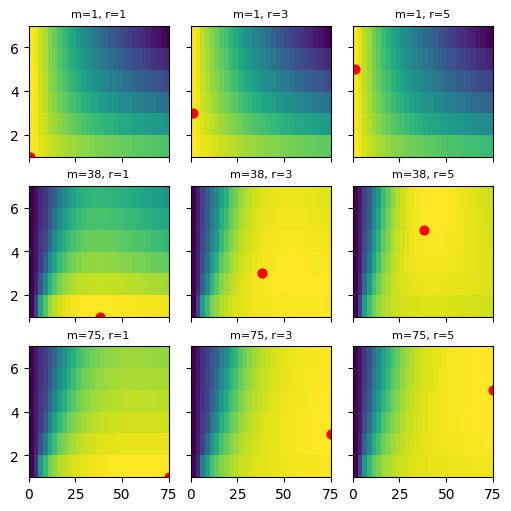

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(5, 5), sharex=True, sharey=True, constrained_layout=True)

for i, m in enumerate(np.linspace(1, 3*T/4, 3)):
    for j, r in enumerate(range(1, 7,2)):
        matrix = calculate_step_model_posterior(M=30, T=100, N_trials=10, m=int(m), r=r, plot=False)
        axs[i, j].imshow(matrix, aspect='auto', origin='lower', extent=[0, 3*T/4, 1, 7])
        axs[i, j].scatter([m], [r], color='red', s=40)
        axs[i, j].set_title(f"m={int(m)}, r={r}", fontsize=8)

The distribution moves as m changes. For low m, the mean of m is low and for high m the mean of m is high (the mean of m more or less tracks m).
For really small values of m, the mean lies above 1, but for higher values of m, the mean is almost exactly 1.
For low number of trials, the distribution changes drastically every time we rerun, for large number of trials, the distribution is more stable.
For higher number of trials, the distribution of m and r have much lower variance

In [ ]:
def calculate_ramp_model_posterior(M, T, N_trials, beta, sigma, plot = False):

    #ramp_spikes = generate_ramp_spikes(beta=beta, sigma=sigma, Rh = 50, N_trials = N_trials, T = T, x0 = 0.2)
    ramp = RampModel(beta=beta, sigma=sigma, x0=0.2, Rh=50)
    ramp_spikes, _ = ramp.simulate(Ntrials=N_trials, T=T, get_rate=False)

    log_likelihood_ramp = ramp_trials(ramp_spikes, N_trials=N_trials)
    log_prior_ramp = np.log(1/(M*M))
    log_posterior_ramp = log_likelihood_ramp + log_prior_ramp

    if plot:
        img = plt.imshow(log_posterior_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
        plt.xlabel("log(sigma)")
        plt.ylabel("beta")
        plt.scatter([np.log(sigma)], [beta], color='red', s=40)
        plt.colorbar(img)
        plt.show()

    beta_values = np.linspace(0, 4, M)
    logsigma_values = np.linspace(np.log(0.04), np.log(4), M)
    beta_mat, logsigma_mat = np.meshgrid(beta_values, logsigma_values, indexing='ij')

    log_denominator = logsumexp(log_likelihood_ramp)

    # ---- beta: mean and variance ----
    log_weighted_beta = np.log(beta_mat + 1e-12) + log_likelihood_ramp
    log_weighted_beta2 = np.log(beta_mat**2 + 1e-12) + log_likelihood_ramp

    log_mean_beta = logsumexp(log_weighted_beta) - log_denominator
    log_mean_beta2 = logsumexp(log_weighted_beta2) - log_denominator

    mean_beta = np.exp(log_mean_beta)
    var_beta = np.exp(log_mean_beta2) - mean_beta**2

    # ---- sigma: mean and variance ----
    sigma_mat = logsigma_mat + 5
    log_weighted_sigma = np.log(sigma_mat + 1e-12) + log_likelihood_ramp
    log_weighted_sigma2 = np.log(sigma_mat**2 + 1e-12) + log_likelihood_ramp

    log_mean_sigma = logsumexp(log_weighted_sigma) - log_denominator
    log_mean_sigma2 = logsumexp(log_weighted_sigma2) - log_denominator

    mean_sigma = np.exp(log_mean_sigma)
    var_sigma = np.exp(log_mean_sigma2) - mean_sigma**2

    print(f"Ramp model:")
    print(f"  E[beta]: {mean_beta:.4f}, Var[beta]: {var_beta:.4f}")
    print(f"  E[log(sigma)]: {mean_sigma - 5:.4f}, Var[log(sigma)]: {var_sigma:.4f}")

    return log_posterior_ramp

Ramp model:
  E[beta]: 0.0832, Var[beta]: 0.0160
  E[log(sigma)]: -2.3015, Var[log(sigma)]: 0.6109
Ramp model:
  E[beta]: 0.1230, Var[beta]: 0.0336
  E[log(sigma)]: -0.7438, Var[log(sigma)]: 0.2865
Ramp model:
  E[beta]: 2.0403, Var[beta]: 1.3665
  E[log(sigma)]: 0.7048, Var[log(sigma)]: 0.2719
Ramp model:
  E[beta]: 2.8482, Var[beta]: 0.9612
  E[log(sigma)]: -0.6398, Var[log(sigma)]: 1.9314
Ramp model:
  E[beta]: 1.8292, Var[beta]: 0.5930
  E[log(sigma)]: -1.5597, Var[log(sigma)]: 1.2562
Ramp model:
  E[beta]: 2.4789, Var[beta]: 1.3864
  E[log(sigma)]: 0.5495, Var[log(sigma)]: 0.9363
Ramp model:
  E[beta]: 3.0644, Var[beta]: 0.9436
  E[log(sigma)]: -0.8597, Var[log(sigma)]: 2.1944
Ramp model:
  E[beta]: 2.3782, Var[beta]: 1.4212
  E[log(sigma)]: 0.7847, Var[log(sigma)]: 0.6023
Ramp model:
  E[beta]: 1.2017, Var[beta]: 0.7580
  E[log(sigma)]: 0.1627, Var[log(sigma)]: 0.2575


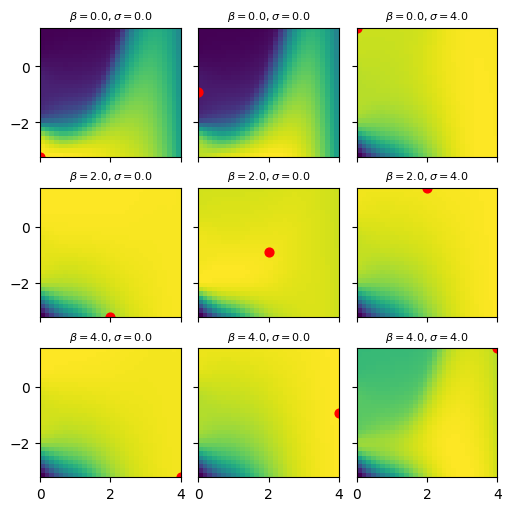

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(5, 5), sharex=True, sharey=True, constrained_layout=True)

for i, beta in enumerate(np.linspace(0, 4, 3)):
    for j, logsigma in enumerate(np.linspace(np.log(0.04), np.log(4), 3)):
        matrix = calculate_ramp_model_posterior(M=30, T=100, N_trials=2, sigma = np.exp(logsigma), beta = beta, plot=False)
        axs[i, j].imshow(matrix, aspect='auto', origin='lower', extent=[0, 4, np.log(0.04), np.log(4)])
        axs[i, j].scatter([beta], [logsigma], color='red', s=40)
        axs[i, j].set_title(rf"$\beta={np.round(beta, 2)}, \sigma={np.round(np.exp(logsigma))}$", fontsize=8)

The distribution moves as beta and sigma changes. The posterior mean of beta tends to increase for larger beta, and posterior mean of logsigma tends to increase for larger log sigma. Larger values of beta produce larger variance in beta.
For low number of trials, the distribution changes drastically every time we rerun, for large number of trials, the distribution is more stable.
For higher number of trials, the distribution of m and r have much lower variance

### Task 3.2
**Model selection (grid based)**

The Bayesian method for model selection is the computation of so-called Bayes factors, i.e. the model posteriors (for $\mathcal{M} = $ *ramp* or *step*):

$P(\mathcal{M}| \mathrm{data}) \propto P(\mathrm{data}| \mathcal{M}) P(\mathcal{M})$

where $P(\mathcal{M})$ denotes the prior probability of each model (and $\mathrm{data}=\{(n_t)_{t=1}^T\}$), which we will take to be 0.5 throughout. In this case, the posterior<br>
model probabilities are proportional to their so-called **marginal likelihoods** $P(\mathrm{data}| \mathcal{M})$, and model selection can be entirely based on the **marginal likelihood ratio (MLR)**,<br>
also known as the **Bayes factor**: <br>

$R = \frac{P(\mathrm{data}| \mathcal{M}=ramp)}{P(\mathrm{data}| \mathcal{M}=step)}\qquad\qquad$     **(3.2)**

or its logarithm, with the ramp model chosen if $R>1$ or $\ln R > 0$, and vice versa.

$P(\mathrm{data}| \mathcal{M})$ is called marginal likelihood because its calculation involves integrating out (or marginalizing) model parameters:

$P(\mathrm{data}| \mathcal{M}) = \int P(\mathrm{data}|\Theta, \mathcal{M}) P(\Theta| \mathcal{M})\, d\Theta.\qquad\qquad$   **(3.3)**

Comparison with Eq. (3.1) shows that this is *exactly* the normalizing constant (the denominator of Bayes rule) for the unnormalized posterior over model parameters. <br>
(The denominator of the Bayes rule 3.1, is also known as "evidence", as it quantifies the strength of evidence in favor of the model.)<br>
So you have already evaluated the marignal likelihoods in Task 3.1 when you normalized the posteriors (up to approximating the integral with a sum over grid points).<br>
(**However,** you need to make sure that you have included the appropriate (approximate) $d\Theta$'s in the formula. This is the volume of each square in your grid, and for <br>
integer $r$ the number of integers within the coarse-grid, if using a coarse-grid. Also note that this depends on your choice of normalization of the prior; ultimately what <br>
matters is that if you replace $P(\mathrm{data}|\Theta, \mathcal{M})$ in Eq. (3.3) with 1, the integral or grid-sum should evaluate to 1.)


Do model selection, based on the MLR, for datasets of different sizes (number of trials) and quantify the two different error rates. <br>

- **3.2.1:** First do this by sampling the ("true") parameters, used for generating a dataset from each model, from that model's prior parameter distribution.

- **3.2.2:** Repeat this with "mismatched" parameter priors: without changing the parameter-sampling distribution (i.e. keep sampling parameters exactly as in 3.2.1), use different priors for parameter inference.<br>
Specifically, use truncated Gaussian prior distributions (uncorrelated/independent across different parameters) that are centered in the middle of the parameter ranges given above for $\beta$, $\sigma$ and $m$, but at the low end for $r$ (i.e. centered at $r=1$). Try different values for the corresponding prior Gaussian standard deviations (SD). Speficially, for all parameters choose their SD to be the *same* fraction of the length of their respective range, but try 2 or 3 different values for this fraction (say, 1/2, 1/4, etc.).**§** <br>
What happens to the error rates? Describe how this depends on the dataset size (try 25, 50, 100, 400 trials), as well as on the degree of divergence between the data-generation distribution and the priors.<br>

- **3.2.3:** Now evaluate the error rates when you also sample the parameters from centered truncated Gaussians; thus the prior distribution and parameter sampling distributions are now matched again but both are Gaussian, rather than uniform. In this case fix the fraction used for setting the SDs of the truncated Gaussian priors to 1/4. In addition, using the same parameter sampling distributions (and not the distributions you used in Task 1.4 of Week 1), re-evaluate the two error rates of the ad-hoc method that you developed in Task 1.4 (without re-training that algorithm or changing any of its hyperparameters -- i.e. apply the exact same code to spike-train datasets generated by model parameters sampled from the new, truncated Gaussians distribution). How do the error rates compare with those obtained in Week 1, and how do they differ from the error rates of the Bayesian method? What conclusions can you draw from these comparisons about any advantages or drawbacks of Bayesian model selection?
  
**§:** Note that we are still using the discritized parameter grid (used to approximate the marginal likelihood integral by a discrete sum), so by Gaussian distribution we really mean truncated Gaussians. More precisely let the prior probability of each choice of $\Theta$ in the grid be given by the expression for the Gaussian probability density, but then normalize this prior  to sum to 1 over the parameter grid.

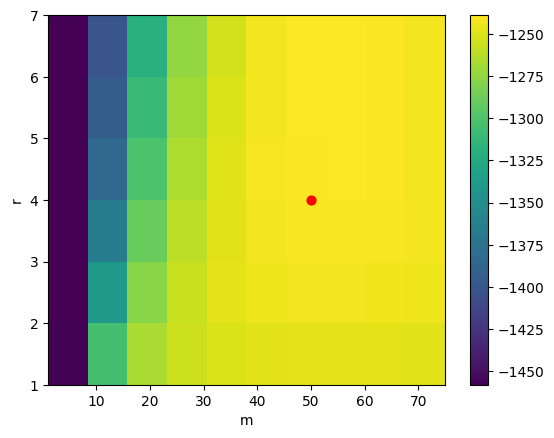

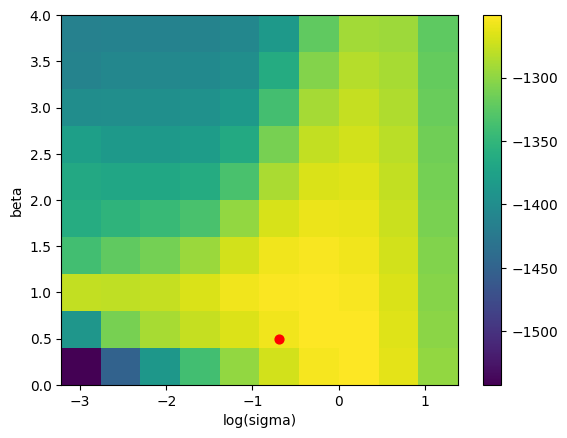

-12.789268954143836


In [ ]:
import numpy as np
from scipy.special import logsumexp

M = 10
T = 100
N_trials = 20

r,m = 4, 50
beta,sigma = 0.5, 0.5

step = StepModel(m=m, r=r)
ramp = RampModel(beta=beta, sigma=sigma)
spikes = step.simulate(Ntrials = N_trials, T=T)[0]

#spikes = generate_step_spikes(r = r, m = m, Rh = 50, N_trials = N_trials, T = T, x0 = 0.2)

log_likelihood_step = step_trials(spikes, N_trials = N_trials, M = M)
log_prior_dtheta_step = np.ones(log_likelihood_step.shape) * np.log(1/(6*M))
log_denominator_step = logsumexp(log_likelihood_step + log_prior_dtheta_step)

img = plt.imshow(log_likelihood_step + log_prior_dtheta_step, origin='lower', extent=[1, 3*T/4, 1, 7], aspect='auto')
plt.xlabel("m")
plt.ylabel("r")
plt.scatter([m], [r], color='red', s=40)
plt.colorbar(img)
plt.show()

log_likelihood_ramp = ramp_trials(spikes, N_trials=N_trials, M = M)
log_prior_dtheta_ramp = np.ones(log_likelihood_ramp.shape) * np.log(1/(M*M))
log_denominator_ramp = logsumexp(log_likelihood_ramp + log_prior_dtheta_ramp)

img = plt.imshow(log_likelihood_ramp + log_prior_dtheta_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
plt.xlabel("log(sigma)")
plt.ylabel("beta")
plt.scatter([np.log(sigma)], [beta], color='red', s=40)
plt.colorbar(img)
plt.show()

log_bayes_factor = log_denominator_ramp - log_denominator_step

print(log_bayes_factor)

In [ ]:
#generate a set of datasets for each model

def generate_datasets(N_trials, T, N = 50):
  D_step = []
  D_ramp = []

  for i in tqdm(range(N)):
    m = np.random.randint(1, 3*T/4)
    r = np.random.randint(1, 7)
    beta = np.random.uniform(low=0, high=4, size=1)
    logsigma = np.random.uniform(low=np.log(0.04), high=np.log(4), size=1)

    #step_spikes = generate_step_spikes(r = r, m = m, Rh = 50, N_trials = N_trials, T = T, x0 = 0.2)
    #ramp_spikes = generate_ramp_spikes(beta=beta, sigma=np.exp(logsigma), Rh = 50, N_trials = N_trials, T = T, x0 = 0.2)
    step = StepModel(m=m, r=r)
    ramp = RampModel(beta=beta, sigma=np.exp(logsigma))
    step_spikes = step.simulate(Ntrials=N_trials, T=T)[0]
    ramp_spikes = ramp.simulate(Ntrials=N_trials, T=T)[0]

    D_step.append(step_spikes)
    D_ramp.append(ramp_spikes)


  return D_step, D_ramp

In [ ]:
def tally_accuracy(D, M, N_trials, log_prior_dtheta_step, log_prior_dtheta_ramp, plot_imshow = False):
  count = 0
  for i in tqdm(range(len(D))):
    log_likelihood_step = step_trials(D[i], N_trials=N_trials, M = M)
    log_denominator_step = logsumexp(log_likelihood_step + log_prior_dtheta_step)

    if plot_imshow:
      img = plt.imshow(log_prior_dtheta_step, origin='lower', extent=[0, 3*T/4, 1, 7], aspect='auto')
      plt.xlabel("m")
      plt.ylabel("r")
      plt.colorbar(img)
      plt.show()

      img = plt.imshow(log_likelihood_step, origin='lower', extent=[0, 3*T/4, 1, 7], aspect='auto')
      plt.xlabel("m")
      plt.ylabel("r")
      plt.colorbar(img)
      plt.show()


      img = plt.imshow(log_likelihood_step + log_prior_dtheta_step, origin='lower', extent=[0, 3*T/4, 1, 7], aspect='auto')
      plt.xlabel("m")
      plt.ylabel("r")
      plt.colorbar(img)
      plt.show()


    log_likelihood_ramp = ramp_trials(D[i], N_trials=N_trials, M = M)
    log_denominator_ramp = logsumexp(log_likelihood_ramp + log_prior_dtheta_ramp)

    if plot_imshow:

      img = plt.imshow(log_prior_dtheta_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
      plt.xlabel("log(sigma)")
      plt.ylabel("beta")
      plt.colorbar(img)
      plt.show()

      img = plt.imshow(log_likelihood_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
      plt.xlabel("log(sigma)")
      plt.ylabel("beta")
      plt.colorbar(img)
      plt.show()

      img = plt.imshow(log_likelihood_ramp + log_prior_dtheta_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
      plt.xlabel("log(sigma)")
      plt.ylabel("beta")
      plt.colorbar(img)
      plt.show()

    log_bayes_factor = log_denominator_ramp - log_denominator_step

    if log_bayes_factor > 0:
      count += 1
    #print(log_bayes_factor, count / (i+1))
  return count / len(D)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def make_prior(a, b, mu, sigma, M):
  bin_centres = np.linspace(a, b, M)
  bin_width = bin_centres[1] - bin_centres[0]

  bin_edges = np.concatenate([
      [bin_centres[0] - bin_width / 2],
      (bin_centres[:-1] + bin_centres[1:]) / 2,
      [bin_centres[-1] + bin_width / 2]
  ])

  cdf_vals = norm.cdf(bin_edges, loc=mu, scale=sigma)
  bin_probs = np.diff(cdf_vals)
  Z = norm.cdf(b, mu, sigma) - norm.cdf(a, mu, sigma)
  bin_probs /= np.sum(bin_probs)

  return bin_probs

In [ ]:
def make_log_prior(k, T, M):
    r_prior = make_prior(1, 6, 1, 5*k, 6)
    m_prior = make_prior(1, 3*T/4, 3*T/8, 3*T/4 *k, M)
    beta_prior = make_prior(0, 4, 2, 4*k, M)
    logsigma_prior = make_prior(np.log(0.04), np.log(4), (np.log(0.04) + np.log(4)) / 2,  ((np.log(4) - np.log(0.04)))*k, M)

    prior_dtheta_step = np.outer(r_prior, m_prior)
    prior_dtheta_ramp = np.outer(beta_prior, logsigma_prior)
    log_prior_dtheta_step = np.log(prior_dtheta_step)
    log_prior_dtheta_ramp = np.log(prior_dtheta_ramp)

    return log_prior_dtheta_step, log_prior_dtheta_ramp

In [ ]:
del sum

NameError: name 'sum' is not defined

In [ ]:
D_step, D_ramp = generate_datasets(N_trials = 100, T = 100, N = 25)

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
from joblib import Parallel, delayed
from tqdm.notebook import tqdm
from tqdm_joblib import tqdm_joblib
from scipy.special import logsumexp

def compute_single_bayes_factor(d, M, N_trials, log_prior_dtheta_step, log_prior_dtheta_ramp):
    log_likelihood_step = step_trials(d, N_trials=N_trials, M=M)
    log_denominator_step = logsumexp(log_likelihood_step + log_prior_dtheta_step)
    
    log_likelihood_ramp = ramp_trials(d, N_trials=N_trials, M=M)
    log_denominator_ramp = logsumexp(log_likelihood_ramp + log_prior_dtheta_ramp)
    
    return log_denominator_ramp > log_denominator_step  # True if ramp favored

def tally_accuracy_parallel(D, M, N_trials, log_prior_dtheta_step, log_prior_dtheta_ramp, n_jobs=-1):
    with tqdm_joblib(desc="Computing accuracy", total=len(D)):
        results = Parallel(n_jobs=n_jobs)(
            delayed(compute_single_bayes_factor)(
                d, M, N_trials, log_prior_dtheta_step, log_prior_dtheta_ramp
            ) for d in D
        )

    return sum(results) / len(D)


In [ ]:
compute_single_bayes_factor(D_step[0], M=30, N_trials=10, log_prior_dtheta_step=log_prior_dtheta_step, log_prior_dtheta_ramp=log_prior_dtheta_ramp)

ValueError: operands could not be broadcast together with shapes (6,30) (6,10) 

In [ ]:
N_trials_values = [25, 50, 100, 400]
k_values = [1/8, 1/4, 1/2, 1]
M = 10

jobs = []
for k in [None] + k_values:  # None = uniform prior
    for N in N_trials_values:
        if k is None:
            log_p_step = np.full((6, M), np.log(1 / (6 * M)))
            log_p_ramp = np.full((M, M), np.log(1 / (M * M)))
        else:
            log_p_step, log_p_ramp = make_log_prior(k=k, T=100, M=M)
        
        for d in D_ramp:
            jobs.append((k, N, d, 'ramp', log_p_step, log_p_ramp))
        for d in D_step:
            jobs.append((k, N, d, 'step', log_p_step, log_p_ramp))


In [ ]:
def run_single_flat_job(k, N, d, which, log_p_step, log_p_ramp):
    result = compute_single_bayes_factor(d, M, N, log_p_step, log_p_ramp)
    return (k, N, which, result)

In [ ]:
with tqdm_joblib(desc="All jobs flat", total=len(jobs)):
    flat_results = Parallel(n_jobs=-1)(
        delayed(run_single_flat_job)(k, N, d, which, log_p_step, log_p_ramp)
        for (k, N, d, which, log_p_step, log_p_ramp) in jobs
    )

All jobs flat:   0%|          | 0/2000 [00:00<?, ?it/s]

In [ ]:
from collections import defaultdict

# Count correct predictions per group
counts = defaultdict(lambda: {'ramp': [], 'step': []})

for k, N, which, result in flat_results:
    counts[(k, N)][which].append(result)

# Final accuracy tables
results_uniform = np.zeros((len(N_trials_values), 2))
results_nonuniform = np.zeros((len(N_trials_values), len(k_values), 2))

for i, N in enumerate(N_trials_values):
    # Uniform
    ramp_acc = np.mean(counts[(None, N)]['ramp'])
    step_acc = np.mean(counts[(None, N)]['step'])
    results_uniform[i] = [ramp_acc, step_acc]

    # Non-uniform
    for j, k in enumerate(k_values):
        ramp_acc = np.mean(counts[(k, N)]['ramp'])
        step_acc = np.mean(counts[(k, N)]['step'])
        results_nonuniform[i, j] = [ramp_acc, step_acc]

In [ ]:
results_uniform

array([[0.98, 0.34],
       [0.98, 0.3 ],
       [0.98, 0.3 ],
       [1.  , 0.28]])

In [ ]:
results_nonuniform

array([[[0.8 , 0.28],
        [0.9 , 0.28],
        [0.96, 0.34],
        [0.98, 0.34]],

       [[0.9 , 0.22],
        [0.92, 0.24],
        [0.94, 0.26],
        [0.96, 0.3 ]],

       [[0.92, 0.26],
        [0.98, 0.28],
        [0.98, 0.28],
        [0.98, 0.28]],

       [[1.  , 0.26],
        [1.  , 0.26],
        [1.  , 0.28],
        [1.  , 0.28]]])

In [ ]:
D_step, D_ramp = generate_datasets(N_trials = 100, T = 100, N = 25)

  0%|          | 0/25 [00:00<?, ?it/s]

In [ ]:
#Test step model for a single point

N_trials = 100
k = 1/4
M = 10

# Priors
log_p_step, log_p_ramp = make_log_prior(k=k, T=100, M=M)

# Parallel computation
from joblib import Parallel, delayed
from tqdm_joblib import tqdm_joblib

with tqdm_joblib(desc=f"Step model (N={N_trials}, k={k})", total=len(D_step)):
    results = Parallel(n_jobs=-1)(
        delayed(compute_single_bayes_factor)(d, M, N_trials, log_p_step, log_p_ramp)
        for d in D_step
    )

# Accuracy
print(f"Accuracy (step): {np.mean(results):.3f}")

Step model (N=100, k=0.25):   0%|          | 0/25 [00:00<?, ?it/s]

Accuracy (step): 0.040


# Week 4

In this task we will explore the effect of **model mismatch** on model selection, and the related concept of **brittleness** (a term coined in Chandrasekaran et al. 2018).<br>
As may be intuitive, mismatch of either model with the true data generative process would lead to additional systematic errors in model selection (as a means to hypothesis testing).
Brittleness refers to a special case of this: in order to quantitatively evaluate empirical evidence for a conceptual hypothesis (such as whether a LIP neuron "continuously
accumulates evidence by ramping up its activity", or whether "its firing rate abruptly jumps during a trial at a random time") we need to concoct a precise mathematical model to encapsulate
the alternative conceptual hypotheses. In order to carry out probabilistic/Bayesian inference we further need these models to be probabilistic models, with a likelihood function
and a prior distribution over parameters. In the process of designing such mathematical models, in general, and probabilistic models, in particular, various choices need to be made
for different aspects of the model which are independent of the conceptual hypotheses and are not constrained by them.

For example, in our case, a model that is identical to our step model, but has a jump time distribution that is not negative binomial, but, say, a uniform distribution, is still consistent with the<br>
conceptual hypothesis of a discontinous jump in the firing rate, as opposed to a continuous ramp.<br>  
As another example, our two competing hypotheses differ only in their predictions for the behaviour of latent firing rates, and are silent on the precise mechanism or statistical form of <br>
spiking based on those firing rates. However, in order to build a probabilistic model of our observed data (spike counts) we needed to make a modeling choice and decided to model spike counts as<br> Poisson distributed (conditional on rates).<br>

But what if reality deviates from these assumptions? What effect would such deviations have on our inferences about the true mechanism underlying the data?<br>
Finally, what can we do to reduce the brittleness of hypothesis testing? This task is intended to provide insight about these questions.

For all the tasks below, use $M = 10$, and unless otherwise instructed, $N_{\rm trials} = 25$, to save on computational time. For number of datasets (to evaluate error rates)<br>
use 10 datasets at a minimum, and no need to exceed 100. (In general, be strategic about choice of the number of datasets. If you see, based on small-scale explorations, that a trend that<br>
is the subject of a sub-task or question is visible for a smaller number of datasets, you don't need to use more datasets.)

### Task 4.1
**Non-Poissonian spiking**

Here you will study the effect of (unaccounted) non-Poissonian spiking on the model selection. The function `gamma_isi_point_process` in `models.py` allows you<br>
to simulate non-Poissonian spikes within a certain family for which inter-spike interval (ISI)  distributions deviate from the exponential distribution<br>
which is the ISI distribution under Poisson spiking (this corresponds to the special case of `shape = 1` for the parameter of `gamma_isi_point_process`).<br>
(You are not directly interested in ISI's and their distribution for the tasks.)

Generalise your code implementing the HMM-based ramp and step models to emit spikes according to the new distribution family (inspection of the `emit` methods of the ramp and step model<br>
classes in `models.py`  shows you how to use `gamma_isi_point_process`).

**4.1.1** Investigate the behavior of the two types of model-selection error rate (the mis-classification rate for each case of true model) with increasing values of the<br>
`shape` parameter of `gamma_isi_point_process` (do not use values of `shape` less than 1, and no need to go above 5). Try this for a few different choices of true model parameters<br>
(making sure they are chosen to produce ramp-like PSTH's). In this sub-task use $N_{\rm trials} = 25$.

How does deviation from Poisson  (with `shape` > 1) affect the two error rates? Does it bias the model selection to one or the other model systematically? If so, towards which model?  

**4.1.2** The model-mismatch due to non-Poisson spiking is an example of mismatch of a model's likelihood with the true data-generating model. A mismatch of model prior with the <br>
true distribution from which true model parameters are sampled (in the real world, this could correspond to the variation of parameters across real LIP neurons, for example)<br>
can also affect model selection. You have already investigated this in 3.2.2. Investigate the difference in the effect of number of trials on model misclassification biases, <br>
for the two cases of prior mismatch and unaccounted non-Poissonian spiking (choose a sensible degree of prior mismatch based on your explorations in 3.2.2).<br>
If there is a systematic difference, try to provide an explanation. <br>
(You can use $N_{\rm trials} = 10, 20, 50, 200$ --and higher if possible-- and you can fix the true parameters, including `shape`, to reasonable values; reasonable according to your previous findings.)

#### 4.1.1

In [ ]:
from scipy.stats import norm
from tqdm.notebook import tqdm
from concurrent.futures import ProcessPoolExecutor
import os
import numpy as np
from scipy.special import logsumexp

# import inference
# from inference import *

# import models
# from models import *


In [ ]:
def generate_step_trial_ll(r, m, spikes, T=100, T_total=None, x0=0.2, Rh=50, N_trials=10):
    if T_total is None:
        T_total = T + r  # For padding logic

    dt = 1 / T_total  # Must match simulation total time

    K = r + 1
    Rl = x0 * Rh

    pi = np.zeros(K)
    pi[0] = 1.0

    T_matrix = np.zeros((K, K))
    p = r / (m + r)
    for s in range(K - 1):
        T_matrix[s, s] = 1 - p
        T_matrix[s, s + 1] = p
    T_matrix[r, r] = 1.0

    lambdas = np.linspace(Rl, Rh, K) * dt

    ll = poisson_logpdf(spikes.astype(int), lambdas)
    ll = np.vstack([np.zeros((r, K)), ll])  # pad r rows of zeros

    return hmm_normalizer(pi, T_matrix, ll)

def build_ramp_hmm(beta, sigma, dt, K):
    xs = np.linspace(0, 1, K)
    edges = np.empty(K+1)
    edges[1:-1] = (xs[:-1] + xs[1:]) / 2
    edges[0], edges[-1] = -np.inf, np.inf

    T = np.zeros((K, K))
    var = sigma**2 * dt

    for s in range(K):
        mu = xs[s] + beta * dt
        cdfs = norm.cdf(edges, loc=mu, scale=np.sqrt(var))
        probs = cdfs[1:] - cdfs[:-1]
        probs /= probs.sum()
        T[s] = probs

    T[-1, :] = 0
    T[-1, -1] = 1

    return T, edges, xs

def build_initial_pi(x0, sigma, dt, edges):
    var = sigma**2 * dt
    cdfs = norm.cdf(edges, loc=x0, scale=np.sqrt(var))
    pi = cdfs[1:] - cdfs[:-1]
    pi /= pi.sum()
    return pi

def generate_ramp_trial_ll(beta, sigma, spikes, T = 100, K = 50, x0 = 0.2, Rh = 50, N_trials = 10):
  dt = 1 / T
  T_matrix, edges, xs = build_ramp_hmm(beta, sigma, dt, K)
  pi = build_initial_pi(x0, sigma, dt, edges)

  lambdas = Rh * xs * dt
  ll = poisson_logpdf(spikes.astype(int), lambdas)

  posterior, logZ = hmm_expected_states(pi, T_matrix, ll)
  A = hmm_normalizer(pi, T_matrix, ll)
  return A

def find_step_log_likelihood(r, m, spikes, N_trials=50, x0=0.2, T=100):
    T_total = T + r
    log_likelihood = 0
    for i in range(N_trials):
        log_likelihood += generate_step_trial_ll(
            r=r, m=m, x0=x0, spikes=spikes[i], T=T, T_total=T_total
        )
    return log_likelihood




def find_ramp_log_likelihood(beta, sigma, spikes, N_trials = 50, x0 = 0.2):
  log_likelihood = 0
  for i in range(N_trials):
    log_likelihood += generate_ramp_trial_ll(beta = beta, sigma = sigma, x0 = x0, spikes = spikes[i])
  return log_likelihood

# def step_trials(step_spikes, x0 = 0.2, Rh = 50, T = 100, N_trials = 10, M = 30):
#   #step_spikes = generate_step_spikes(r, m, Rh = Rh, N_trials = N_trials, T = T, x0 = x0)
#   log_likelihood_step = np.zeros((6, M))

#   for i, r_ in enumerate((range(1, 7))):
#     for j, m_ in enumerate(np.linspace(0, 3*T/4, M)):
#       log_likelihood_step[i, j] = find_step_log_likelihood(r = int(r_), m = int(m_), spikes = step_spikes, N_trials = N_trials)

#   return log_likelihood_step

# def ramp_trials(ramp_spikes, x0 = 0.2, Rh = 50, T = 100, N_trials = 10, M = 30):
#   #ramp_spikes = generate_ramp_spikes(beta, sigma, Rh = Rh, N_trials = N_trials, T = T, x0 = x0)

#   log_likelihood_ramp = np.zeros((M, M))

#   for i, beta_ in enumerate((np.linspace(0, 4, M))):
#     for j, logsigma_ in enumerate(np.linspace(np.log(0.04), np.log(4), M)):
#       log_likelihood_ramp[i, j] = find_ramp_log_likelihood(beta = beta_, sigma = np.exp(logsigma_), spikes = ramp_spikes, N_trials = N_trials)
#   return log_likelihood_ramp

def step_trials(step_spikes, x0=0.2, Rh=50, T=100, N_trials=10, M=30):
    r_grid = np.arange(1, 7)
    m_grid = np.linspace(1, 3*T/4, M)

    log_likelihood_step = np.zeros((len(r_grid), len(m_grid)))

    for i, r in enumerate(r_grid):
        for j, m in enumerate(m_grid):
            log_likelihood_step[i, j] = find_step_log_likelihood(
                r=int(r), m=int(m), spikes=step_spikes, N_trials=N_trials, T=T
            )

    return log_likelihood_step


    return log_likelihood_step
  
def ramp_trials(ramp_spikes, x0=0.2, Rh=50, T=100, N_trials=10, M=30):
    beta_grid = np.linspace(0, 4, M)
    logsigma_grid = np.linspace(np.log(0.04), np.log(4), M)

    log_likelihood_ramp = np.zeros((M, M))

    for i, beta in enumerate(beta_grid):
        for j, logsigma in enumerate(logsigma_grid):
            log_likelihood_ramp[i, j] = find_ramp_log_likelihood(
                beta=beta, sigma=np.exp(logsigma), spikes=ramp_spikes, N_trials=N_trials
            )

    return log_likelihood_ramp



def calculate_step_model_posterior(M, T, N_trials, m, r, plot = False):
    step = StepModel(m=m, r=r, x0 = x0)
    step_spikes = step.simulate(Ntrials = N_trials, T=T)[0]

    log_likelihood_step = step_trials(step_spikes, N_trials=N_trials)
    log_prior_step = np.log(1/(6*M))
    log_posterior_step = log_likelihood_step + log_prior_step

    if plot:
        img = plt.imshow(log_posterior_step, origin='lower', extent=[0, 3*T/4, 1, 7], aspect='auto')
        plt.xlabel("m")
        plt.ylabel("r")
        plt.scatter([m], [r], color='red', s=40)
        plt.colorbar(img)
        plt.show()

    r_values = np.array(range(1,7))
    m_values = np.linspace(1, 3*T/4, M)
    r_mat, m_mat = np.meshgrid(r_values, m_values, indexing='ij')

    log_denominator = logsumexp(log_likelihood_step)

    # ---- r: mean and variance ----
    log_weighted_r = np.log(r_mat + 1e-12) + log_likelihood_step
    log_weighted_r2 = np.log(r_mat**2 + 1e-12) + log_likelihood_step

    log_mean_r = logsumexp(log_weighted_r) - log_denominator
    log_mean_r2 = logsumexp(log_weighted_r2) - log_denominator

    mean_r = np.exp(log_mean_r)
    var_r = np.exp(log_mean_r2) - mean_r**2

    # ---- m: mean and variance ----
    log_weighted_m = np.log(m_mat + 1e-12) + log_likelihood_step
    log_weighted_m2 = np.log(m_mat**2 + 1e-12) + log_likelihood_step

    log_mean_m = logsumexp(log_weighted_m) - log_denominator
    log_mean_m2 = logsumexp(log_weighted_m2) - log_denominator

    mean_m = np.exp(log_mean_m)
    var_m = np.exp(log_mean_m2) - mean_m**2

    print(f"Step model:")
    print(f"  E[r]: {mean_r:.4f}, Var[r]: {var_r:.4f}")
    print(f"  E[m]: {mean_m:.4f}, Var[m]: {var_m:.4f}")

    return log_posterior_step



def calculate_ramp_model_posterior(M, T, N_trials, beta, sigma, plot = False):
    ramp = RampModel(beta=beta, sigma=sigma)
    ramp_spikes = ramp.simulate(Ntrials = Ntrials, T=T)[0]

    log_likelihood_ramp = ramp_trials(ramp_spikes, N_trials=N_trials)
    log_prior_ramp = np.log(1/(M*M))
    log_posterior_ramp = log_likelihood_ramp + log_prior_ramp

    if plot:
        img = plt.imshow(log_posterior_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
        plt.xlabel("log(sigma)")
        plt.ylabel("beta")
        plt.scatter([np.log(sigma)], [beta], color='red', s=40)
        plt.colorbar(img)
        plt.show()

    beta_values = np.linspace(0, 4, M)
    logsigma_values = np.linspace(np.log(0.04), np.log(4), M)
    beta_mat, logsigma_mat = np.meshgrid(beta_values, logsigma_values, indexing='ij')

    log_denominator = logsumexp(log_likelihood_ramp)

    # ---- beta: mean and variance ----
    log_weighted_beta = np.log(beta_mat + 1e-12) + log_likelihood_ramp
    log_weighted_beta2 = np.log(beta_mat**2 + 1e-12) + log_likelihood_ramp

    log_mean_beta = logsumexp(log_weighted_beta) - log_denominator
    log_mean_beta2 = logsumexp(log_weighted_beta2) - log_denominator

    mean_beta = np.exp(log_mean_beta)
    var_beta = np.exp(log_mean_beta2) - mean_beta**2

    # ---- sigma: mean and variance ----
    sigma_mat = logsigma_mat + 5
    log_weighted_sigma = np.log(sigma_mat + 1e-12) + log_likelihood_ramp
    log_weighted_sigma2 = np.log(sigma_mat**2 + 1e-12) + log_likelihood_ramp

    log_mean_sigma = logsumexp(log_weighted_sigma) - log_denominator
    log_mean_sigma2 = logsumexp(log_weighted_sigma2) - log_denominator

    mean_sigma = np.exp(log_mean_sigma)
    var_sigma = np.exp(log_mean_sigma2) - mean_sigma**2

    print(f"Ramp model:")
    print(f"  E[beta]: {mean_beta:.4f}, Var[beta]: {var_beta:.4f}")
    print(f"  E[log(sigma)]: {mean_sigma - 5:.4f}, Var[log(sigma)]: {var_sigma:.4f}")

    return log_posterior_ramp

def generate_datasets(N_trials, T, N=50, shape=1):
    D_step = []
    D_ramp = []

    for i in range(N):
        m = np.random.randint(0, int(3*T/4))
        r = np.random.randint(1, 7)
        beta = np.random.uniform(low=0, high=4)
        logsigma = np.random.uniform(low=np.log(0.04), high=np.log(4))

        step = StepModel(m=m, r=r, isi_gamma_shape=shape)
        ramp = RampModel(beta=beta, sigma=np.exp(logsigma), isi_gamma_shape=shape)

        D_step.append(step.simulate(Ntrials=N_trials, T=T)[0])
        D_ramp.append(ramp.simulate(Ntrials=N_trials, T=T)[0])

    return D_step, D_ramp

def tally_accuracy(D, M, N_trials, log_prior_dtheta_step = None, log_prior_dtheta_ramp = None, plot_imshow = False):
  count = 0
  for i in tqdm(range(len(D))):
    log_likelihood_step = step_trials(D[i], N_trials=N_trials, M = M)
    log_denominator_step = logsumexp(log_likelihood_step + log_prior_dtheta_step)

    if plot_imshow:
      img = plt.imshow(log_prior_dtheta_step, origin='lower', extent=[0, 3*T/4, 1, 7], aspect='auto')
      plt.xlabel("m")
      plt.ylabel("r")
      plt.colorbar(img)
      plt.show()

      img = plt.imshow(log_likelihood_step, origin='lower', extent=[0, 3*T/4, 1, 7], aspect='auto')
      plt.xlabel("m")
      plt.ylabel("r")
      plt.colorbar(img)
      plt.show()


      img = plt.imshow(log_likelihood_step + log_prior_dtheta_step, origin='lower', extent=[0, 3*T/4, 1, 7], aspect='auto')
      plt.xlabel("m")
      plt.ylabel("r")
      plt.colorbar(img)
      plt.show()


    log_likelihood_ramp = ramp_trials(D[i], N_trials=N_trials, M = M)
    log_denominator_ramp = logsumexp(log_likelihood_ramp + log_prior_dtheta_ramp)

    if plot_imshow:

      img = plt.imshow(log_prior_dtheta_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
      plt.xlabel("log(sigma)")
      plt.ylabel("beta")
      plt.colorbar(img)
      plt.show()

      img = plt.imshow(log_likelihood_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
      plt.xlabel("log(sigma)")
      plt.ylabel("beta")
      plt.colorbar(img)
      plt.show()

      img = plt.imshow(log_likelihood_ramp + log_prior_dtheta_ramp, origin='lower', extent=[np.log(0.04), np.log(4), 0, 4], aspect='auto')
      plt.xlabel("log(sigma)")
      plt.ylabel("beta")
      plt.colorbar(img)
      plt.show()

    log_bayes_factor = log_denominator_ramp - log_denominator_step

    if log_bayes_factor > 0:
      count += 1
    #print(log_bayes_factor, count / (i+1))
  return count / len(D)

def make_prior(a, b, mu, sigma, M):
  bin_centres = np.linspace(a, b, M)
  bin_width = bin_centres[1] - bin_centres[0]

  bin_edges = np.concatenate([
      [bin_centres[0] - bin_width / 2],
      (bin_centres[:-1] + bin_centres[1:]) / 2,
      [bin_centres[-1] + bin_width / 2]
  ])

  cdf_vals = norm.cdf(bin_edges, loc=mu, scale=sigma)
  bin_probs = np.diff(cdf_vals)
  Z = norm.cdf(b, mu, sigma) - norm.cdf(a, mu, sigma)
  bin_probs /= np.sum(bin_probs)

  return bin_probs

def make_log_prior(k, T, M):
    r_prior = make_prior(1, 6, 1, 5*k, 6)
    m_prior = make_prior(1, 3*T/4, 3*T/8, 3*T/4 *k, M)
    beta_prior = make_prior(0, 4, 2, 4*k, M)
    logsigma_prior = make_prior(np.log(0.04), np.log(4), (np.log(0.04) + np.log(4)) / 2,  ((np.log(4) - np.log(0.04)))*k, M)

    prior_dtheta_step = np.outer(r_prior, m_prior)
    prior_dtheta_ramp = np.outer(beta_prior, logsigma_prior)
    log_prior_dtheta_step = np.log(prior_dtheta_step)
    log_prior_dtheta_ramp = np.log(prior_dtheta_ramp)

    return log_prior_dtheta_step, log_prior_dtheta_ramp


In [ ]:
def generate_datasets_from_grid(N_trials, T, N=50, shape=1, 
                                r_grid=None, m_grid=None, beta_grid=None, logsigma_grid=None):
    D_step = []
    D_ramp = []

    for _ in range(N):
        # Sample true step parameters from grid
        r = int(np.random.choice(r_grid))
        m = float(np.random.choice(m_grid))
        step = StepModel(m=m, r=r, isi_gamma_shape=shape)
        spikes_full = step.simulate(Ntrials=N_trials, T=T + r)[0]
        spikes = spikes_full[:, -T:]  # keep only the last T steps
        D_step.append(spikes)


        # Sample true ramp parameters from grid
        beta = float(np.random.choice(beta_grid))
        logsigma = float(np.random.choice(logsigma_grid))
        sigma = np.exp(logsigma)
        ramp = RampModel(beta=beta, sigma=sigma, isi_gamma_shape=shape)
        D_ramp.append(ramp.simulate(Ntrials=N_trials, T=T)[0])

    return D_step, D_ramp








In [ ]:
M = 10
T = 100
N_trials = 25
N_datasets = 100
x0 = 0.2
Rh = 50

# Step model grid
r_grid = np.arange(1, 7)  # match prior size
m_grid = np.linspace(0.1*T, 0.9 * T, M)

# Ramp model grid
beta_grid = np.linspace(0, 4, M)
logsigma_grid = np.linspace(np.log(0.04), np.log(4), M)

# Priors (uniform over grid)
log_prior_dtheta_step = np.ones((len(r_grid), M)) * np.log(1 / (len(r_grid) * M))
log_prior_dtheta_ramp = np.ones((M, M)) * np.log(1 / (M * M))

print("=== 4.1.1: Error Rates with Non-Poissonian Spiking ===")

for shape in [1, 2, 3, 4, 5]:
    D_step, D_ramp = generate_datasets_from_grid(
        N_trials=N_trials, T=T, N=N_datasets, shape=shape,
        r_grid=r_grid, m_grid=m_grid,
        beta_grid=beta_grid, logsigma_grid=logsigma_grid
    )

    step_error = tally_accuracy(D_step, M, N_trials,
                                 log_prior_dtheta_step=log_prior_dtheta_step,
                                 log_prior_dtheta_ramp=log_prior_dtheta_ramp)
    ramp_accuracy = tally_accuracy(D_ramp, M, N_trials,
                                   log_prior_dtheta_step=log_prior_dtheta_step,
                                   log_prior_dtheta_ramp=log_prior_dtheta_ramp)
    ramp_error = 1 - ramp_accuracy

    print(f"Shape {shape}: Step Error = {step_error:.2f}, Ramp Error = {ramp_error:.2f}")



=== 4.1.1: Error Rates with Non-Poissonian Spiking ===


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Shape 1: Step Error = 0.13, Ramp Error = 0.05


  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/100 [00:00<?, ?it/s]

Shape 2: Step Error = 0.13, Ramp Error = 0.02


  0%|          | 0/100 [00:00<?, ?it/s]

#### 4.1.2

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm


# Experiment parameters
T = 100
M = 10
trial_counts = [10, 20, 50, 100, 200]
N_datasets = 10  # datasets per setting
shape_list = [1, 2, 3, 5]  # Poisson (1), and gamma-shaped (2)

results = {
    'non_poisson': {},
    'prior_mismatch': {}
}

# ==== 1. NON-POISSON SPIKING (Correct uniform prior) ====
print("=== Running Non-Poissonian Spiking Analysis ===")
for shape in shape_list:
    prior_step, prior_ramp = make_log_prior(k=0, T=T, M=M)  # uniform prior
    for N_trials in trial_counts:
        print(f"Shape = {shape}, Trials = {N_trials}")
        D_step, D_ramp = generate_datasets(N_trials, T, N=N_datasets, shape=shape)

        acc_ramp = tally_accuracy(D_ramp, M, N_trials,
                                  log_prior_dtheta_step=prior_step,
                                  log_prior_dtheta_ramp=prior_ramp)
        acc_step = 1 - tally_accuracy(D_step, M, N_trials,
                                      log_prior_dtheta_step=prior_step,
                                      log_prior_dtheta_ramp=prior_ramp)

        results['non_poisson'][(shape, N_trials)] = (acc_ramp, acc_step)

# ==== 2. PRIOR MISMATCH (Poisson spiking, mismatched priors) ====
print("\n=== Running Prior Mismatch Analysis ===")
shape = 1  # Poisson
k_values = [0, 0.2, 0.5, 1.0]  # Prior mismatch strengths

for k in k_values:
    prior_step, prior_ramp = make_log_prior(k=k, T=T, M=M)
    for N_trials in trial_counts:
        print(f"Prior mismatch k = {k}, Trials = {N_trials}")
        D_step, D_ramp = generate_datasets(N_trials, T, N=N_datasets, shape=shape)

        acc_ramp = tally_accuracy(D_ramp, M, N_trials,
                                  log_prior_dtheta_step=prior_step,
                                  log_prior_dtheta_ramp=prior_ramp)
        acc_step = 1 - tally_accuracy(D_step, M, N_trials,
                                      log_prior_dtheta_step=prior_step,
                                      log_prior_dtheta_ramp=prior_ramp)

        results['prior_mismatch'][(k, N_trials)] = (acc_ramp, acc_step)

# ==== 3. PLOTTING ====

# A. Non-Poisson Spiking Effect Plot
plt.figure(figsize=(10, 5))
for shape in shape_list[1:]:
    ramp_accs = [results['non_poisson'][(shape, N)][0] for N in trial_counts]
    step_accs = [results['non_poisson'][(shape, N)][1] for N in trial_counts]
    plt.plot(trial_counts, ramp_accs, label=f'Ramp correct (shape={shape})', linestyle='-')
    plt.plot(trial_counts, step_accs, label=f'Step correct (shape={shape})', linestyle='--')
plt.title("Effect of Non-Poisson Spiking on Classification Accuracy")
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# B. Prior Mismatch Effect Plot
plt.figure(figsize=(10, 5))
for k in k_values:
    ramp_accs = [results['prior_mismatch'][(k, N)][0] for N in trial_counts]
    step_accs = [results['prior_mismatch'][(k, N)][1] for N in trial_counts]
    plt.plot(trial_counts, ramp_accs, label=f'Ramp correct (k={k})', linestyle='-')
    plt.plot(trial_counts, step_accs, label=f'Step correct (k={k})', linestyle='--')
plt.title("Effect of Prior Mismatch on Classification Accuracy")
plt.xlabel("Number of Trials")
plt.ylabel("Accuracy")
plt.ylim(0, 1.05)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### Task 4.2

**Understanding the effects of non-Poissonian spiking**

This task only involves simulation (spike train generation) of the HMM models (or the models from `models.py`, up to you) with `gamma_isi_point_process` used for spike emission.<br>
By remaking the sort of plots you made in Week 1 (e.g. raster plots and plots of PSTH and Fano Factor vs. time) for the non-Poissonian model and <br>
observing its behavior, answer the following questions:

- How does `shape` affect spiking quality and the resulting Fano Factor behaviour?
- Based on your observations, try to explain the effects  that you observed in **4.1.1** of  non-Poisson spiking on model selection errors.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_psth(spikes, dt=0.01, window_size=5):
    return np.convolve(np.mean(spikes, axis=0)/dt,
                       np.ones(window_size)/window_size, mode='same')

def compute_fano(spikes, bin_size=5):
    N_trials, T = spikes.shape
    reshaped = spikes[:, :T // bin_size * bin_size].reshape(N_trials, -1, bin_size)
    binned_counts = reshaped.sum(axis=2)
    mean = np.mean(binned_counts, axis=0)
    var = np.var(binned_counts, axis=0)
    fano = var / (mean + 1e-12)
    return fano, mean  # to visualize scaling if needed

def plot_task_4_2(model_name, spikes, dt=0.01, shape=1):
    N_trials, T = spikes.shape
    time = np.arange(T) * dt

    # Raster plot
    plt.figure(figsize=(12, 4))
    for i in range(min(50, N_trials)):
        spike_times = np.where(spikes[i] > 0)[0]
        plt.vlines(spike_times * dt, i, i + 0.8, color='black', lw=0.5)
    plt.title(f"{model_name} Raster Plot (shape={shape})")
    plt.xlabel("Time (s)")
    plt.ylabel("Trial")
    plt.show()

    # PSTH
    psth = compute_psth(spikes, dt=dt)
    plt.figure()
    plt.plot(time, psth)
    plt.title(f"{model_name} PSTH (shape={shape})")
    plt.xlabel("Time (s)")
    plt.ylabel("Firing Rate (Hz)")
    plt.grid(True)
    plt.show()

    # Fano Factor
    fano, _ = compute_fano(spikes, bin_size=5)
    plt.figure()
    plt.plot(np.arange(len(fano)) * dt * 5, fano)
    plt.title(f"{model_name} Fano Factor vs Time (shape={shape})")
    plt.xlabel("Time (s)")
    plt.ylabel("Fano Factor")
    plt.grid(True)
    plt.show()

# ==== Run it ====
T = 100
N_trials = 100
shapes = [1, 2, 3, 5]

for shape in shapes:
    step = StepModel(m=50, r=3, isi_gamma_shape=shape)
    step_spikes = step.simulate(Ntrials=N_trials, T=T)[0]
    plot_task_4_2("Step Model", step_spikes, dt=1/T, shape=shape)

    ramp = RampModel(beta=0.5, sigma=0.3, isi_gamma_shape=shape)
    ramp_spikes = ramp.simulate(Ntrials=N_trials, T=T)[0]
    plot_task_4_2("Ramp Model", ramp_spikes, dt=1/T, shape=shape)
